# 1. Introduction



**Monetary Freedom is Key for Economic Freedom**

This project explores the role of Monetary Freedom in shaping overall Economic Freedom across countries. Using the Heritage Foundation’s Index of Economic Freedom (1995–2024), we analyze whether lower Monetary Freedom scores are associated with weaker performance in other dimensions of economic freedom. The goal is to uncover patterns and insights that can inform policy discussions and economic research.

In this notebook, you can expect the following:

1.  **Data Loading and Initial Exploration**: Load and get a first look at the Economic Freedom Index dataset.
2.  **Data Cleaning and Preprocessing**: Handle missing values, standardize text, and prepare the data for analysis.
3.  **Data Splitting**: Divide the dataset into training and testing sets based on time.
4.  **Exploratory Data Analysis (EDA)**: Visualize distributions, trends over time, and correlations to understand the data better.
5.  **Regression Modeling**: Build and evaluate different regression models to predict the 'Overall Score'.
6.  **Model Evaluation and Optimization**: Assess model performance, analyze residuals, and consider techniques like Bayesian Optimization.
7.  **Bias, Fairness & Explainability**: Investigate potential biases in the model's performance and explore ways to explain its predictions.
8.  **Reporting**: Generate reports summarizing the findings, model performance, and ethical considerations.

# 2. Import & Dataset Loading

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

In [173]:
df_efi = pd.read_csv('/content/heritage-index-of-economic-freedom-20250825135744.csv', sep=',', skiprows=3)

# Define the correct column names based on the provided format
column_names = ['Country', 'Index Year', 'Overall Score', 'Property Rights', 'Government Integrity', 'Judicial Effectiveness', 'Tax Burden', 'Government Spending', 'Fiscal Health', 'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom', 'Financial Freedom']
df_efi.columns = column_names

display(df_efi.head())

,Country,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,2025,NaN,7.4,14.1,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2024,NaN,4.9,18.1,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2023,NaN,5.8,5.4,12.7,NaN,NaN,NaN,34.6,45.1,NaN,NaN,NaN,NaN
3,Afghanistan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2021,53.0,30.3,29.1,25.7,91.1,76.1,99.9,53.9,59.9,80.8,68.6,10.0,10.0


In [174]:
df_efi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5704 entries, 0 to 5703
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5704 non-null   object 
 1   Index Year              5704 non-null   int64  
 2   Overall Score           5146 non-null   float64
 3   Property Rights         5204 non-null   float64
 4   Government Integrity    5220 non-null   float64
 5   Judicial Effectiveness  1648 non-null   float64
 6   Tax Burden              5163 non-null   float64
 7   Government Spending     5178 non-null   float64
 8   Fiscal Health           1620 non-null   float64
 9   Business Freedom        5202 non-null   float64
 10  Labor Freedom           3707 non-null   float64
 11  Monetary Freedom        5186 non-null   float64
 12  Trade Freedom           5174 non-null   float64
 13  Investment Freedom      5187 non-null   float64
 14  Financial Freedom       5165 non-null   

In [175]:
print("\nColumns in df_efi:")
for col in df_efi.columns:
    print(col)



Columns in df_efi:
Country
Index Year
Overall Score
Property Rights
Government Integrity
Judicial Effectiveness
Tax Burden
Government Spending
Fiscal Health
Business Freedom
Labor Freedom
Monetary Freedom
Trade Freedom
Investment Freedom
Financial Freedom


In [176]:
# Create a summary table using pandas methods
summary = pd.DataFrame({
    'Feature Name': df_efi.columns,
    'Type': df_efi.dtypes,
    'Missing?': df_efi.isnull().mean().round(2),
    'Unique Values': df_efi.nunique(),
    'Description': '' # Add an empty Description column
})

# Reset index to make 'Feature Name' a regular column
summary = summary.reset_index(drop=True)

# Add descriptions based on feature names and context
descriptions = {
    'country': 'Name of the country',
    'index_year': 'Year of the economic freedom index',
    'overall_score': 'Overall economic freedom score', # Keep or refine based on context
    'property_rights': 'Protection of private ownership and use',
    'judicial_effectiveness': 'Fair, efficient, and independent judiciary',
    'government_integrity': 'Transparent, impartial, corruption-free governance',
    'tax_burden': 'Level of overall taxation impact',
    'government_spending': 'Public expenditures and economic influence',
    'fiscal_health': 'Sustainability of finances and debt',
    'business_freedom': 'Entrepreneurship without excessive regulation',
    'labor_freedom': 'Flexible labor market with contract freedom',
    'monetary_freedom': 'Price stability and independent monetary policy',
    'trade_freedom': 'Free international goods and services exchange',
    'investment_freedom': 'Open capital markets and opportunities',
    'financial_freedom': 'Access to transparent financial services'
}

# Map descriptions to the summary table
summary['Description'] = summary['Feature Name'].map(descriptions)


print("Summary Table of DataFrame Features with Descriptions:")
display(summary)

Summary Table of DataFrame Features with Descriptions:


,Feature Name,Type,Missing?,Unique Values,Description
0,Country,object,0.00,186,NaN
1,Index Year,int64,0.00,31,NaN
2,Overall Score,float64,0.10,582,NaN
3,Property Rights,float64,0.09,693,NaN
4,Government Integrity,float64,0.08,706,NaN
5,Judicial Effectiveness,float64,0.71,702,NaN
6,Tax Burden,float64,0.09,617,NaN
7,Government Spending,float64,0.09,802,NaN
8,Fiscal Health,float64,0.72,678,NaN
9,Business Freedom,float64,0.09,701,NaN


In [177]:
print("\nMissing values per column:")
display(df_efi.isnull().sum())


Missing values per column:


,0
Country,0
Index Year,0
Overall Score,558
Property Rights,500
Government Integrity,484
Judicial Effectiveness,4056
Tax Burden,541
Government Spending,526
Fiscal Health,4084
Business Freedom,502


# 3. Data Cleaning & Preprocessing before Split

In [178]:
# Check for exact duplicates across all columns
exact_duplicates = df_efi.duplicated().sum()
print(f"Exact duplicates found: {exact_duplicates}")

# View duplicate rows
duplicate_rows = df_efi[df_efi.duplicated(keep=False)]
print(f"Total rows involved in duplication: {len(duplicate_rows)}")

# Check duplicates on specific key columns
key_duplicates = df_efi.duplicated(subset=['Overall Score']).sum()
print(f"Duplicates based on Overall Score: {key_duplicates}")

Exact duplicates found: 0
Total rows involved in duplication: 0
Duplicates based on Overall Score: 5121


In [179]:
df_efi = df_efi.reset_index(drop=True)
df_efi.index = df_efi.index + 1

print("DataFrame after resetting index:")
display(df_efi.head())
display(df_efi.index)

DataFrame after resetting index:


,Country,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
1,Afghanistan,2025,NaN,7.4,14.1,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2024,NaN,4.9,18.1,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2023,NaN,5.8,5.4,12.7,NaN,NaN,NaN,34.6,45.1,NaN,NaN,NaN,NaN
4,Afghanistan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,2021,53.0,30.3,29.1,25.7,91.1,76.1,99.9,53.9,59.9,80.8,68.6,10.0,10.0


RangeIndex(start=1, stop=5705, step=1)

> Standardize text columns

In [180]:
# Standardize 'Country' column by converting to lowercase and removing leading/trailing whitespace
df_efi['Country'] = df_efi['Country'].str.lower().str.strip()

print("DataFrame after standardizing 'Country' column:")
display(df_efi.head())

DataFrame after standardizing 'Country' column:


,Country,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
1,afghanistan,2025,NaN,7.4,14.1,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afghanistan,2024,NaN,4.9,18.1,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afghanistan,2023,NaN,5.8,5.4,12.7,NaN,NaN,NaN,34.6,45.1,NaN,NaN,NaN,NaN
4,afghanistan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,afghanistan,2021,53.0,30.3,29.1,25.7,91.1,76.1,99.9,53.9,59.9,80.8,68.6,10.0,10.0


> Standardize column headers

In [181]:
# Standardize column headers
df_efi.columns = df_efi.columns.str.lower().str.replace(' ', '_')

print("DataFrame after standardizing column headers:")
display(df_efi.head())
display(df_efi.columns)

DataFrame after standardizing column headers:


,country,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
1,afghanistan,2025,NaN,7.4,14.1,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afghanistan,2024,NaN,4.9,18.1,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afghanistan,2023,NaN,5.8,5.4,12.7,NaN,NaN,NaN,34.6,45.1,NaN,NaN,NaN,NaN
4,afghanistan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,afghanistan,2021,53.0,30.3,29.1,25.7,91.1,76.1,99.9,53.9,59.9,80.8,68.6,10.0,10.0


Index(['country', 'index_year', 'overall_score', 'property_rights',
       'government_integrity', 'judicial_effectiveness', 'tax_burden',
       'government_spending', 'fiscal_health', 'business_freedom',
       'labor_freedom', 'monetary_freedom', 'trade_freedom',
       'investment_freedom', 'financial_freedom'],
      dtype='object')

In [182]:
# Ensure 'Overall Score' is numeric before Split
df_efi['overall_score'] = pd.to_numeric(df_efi['overall_score'], errors='coerce')

In [183]:
# Create a new dependent variable excluding 'Monetary Freedom'
# We need to recalculate the overall score. Assuming the overall score is the average of the sub-indices.
# If there is a specific formula for the overall score, we should use that instead.
# For this analysis, let's assume the overall score is the average of all sub-indices.
# The original independent variables include 'Monetary Freedom'.
# We need to exclude 'Monetary Freedom' from the list of features used to calculate the new dependent variable.

# Define the list of independent variables by filtering the dataframe columns
independent_variables = [col for col in df_efi.columns if col not in ['country', 'index_year', 'overall_score']]

# List of independent variables excluding 'Monetary Freedom'
independent_variables_without_monetary_freedom = [col for col in independent_variables if col != 'monetary_freedom']

# Calculate the new dependent variable for the original dataframe
# We will take the mean of the columns in 'independent_variables_without_monetary_freedom' for each row
df_efi['overall_score_without_monetary_freedom'] = df_efi[independent_variables_without_monetary_freedom].mean(axis=1)

# Display the first few rows with the new column
print("DataFrame with new dependent variable:")
display(df_efi[['overall_score', 'monetary_freedom', 'overall_score_without_monetary_freedom']].head())

# Update the dependent variable name for subsequent steps
dependent_variable_new = 'overall_score_without_monetary_freedom'

# Display descriptive statistics for the new dependent variable
print("\nDescriptive Statistics for new dependent variable:")
display(df_efi[dependent_variable_new].describe())

DataFrame with new dependent variable:


,overall_score,monetary_freedom,overall_score_without_monetary_freedom
1,NaN,NaN,8.066667
2,NaN,NaN,9.300000
3,NaN,NaN,20.720000
4,NaN,NaN,NaN
5,53.0,80.8,50.418182



Descriptive Statistics for new dependent variable:


,overall_score_without_monetary_freedom
count,5229.000000
mean,57.894434
std,12.420122
min,1.111111
25%,50.836364
50%,58.000000
75%,66.055556
max,91.675000


# 4. Splitting

In [184]:
# Find the earliest and latest years in the dataset
earliest_year = df_efi['index_year'].min()
latest_year = df_efi['index_year'].max()

print(f"The datset reaches from {earliest_year} to {latest_year}.")

The datset reaches from 1995 to 2025.


In [185]:
def temporal_split(df, year_column, split_year):
    """Split dataset chronologically by year."""

    # Convert year to datetime objects (beginning of the year)
    df['datetime'] = pd.to_datetime(df[year_column], format='%Y')
    df_sorted = df.sort_values('datetime')

    # Define the split date as the beginning of the split year
    split_date = pd.to_datetime(split_year, format='%Y')

    train_data = df_sorted[df_sorted['datetime'] < split_date].drop(columns=['datetime'])
    test_data = df_sorted[df_sorted['datetime'] >= split_date].drop(columns=['datetime'])

    return train_data, test_data

# Apply temporal split to df_efi
split_year = 2020
train_df_efi, test_df_efi = temporal_split(df_efi.copy(), 'index_year', split_year)

print(f"Temporal split of df_efi at the beginning of {split_year}:")
print(f"Training period: {train_df_efi['index_year'].min()} to {train_df_efi['index_year'].max()}")
print(f"Test period: {test_df_efi['index_year'].min()} to {test_df_efi['index_year'].max()}")


display("Train DataFrame Head:")
display(train_df_efi.head())

display("Test DataFrame Head:")
display(test_df_efi.head())

Temporal split of df_efi at the beginning of 2020:
Training period: 1995 to 2019
Test period: 2020 to 2025


'Train DataFrame Head:'

,country,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom,overall_score_without_monetary_freedom
5704,zimbabwe,1995,48.5,50.0,30.0,NaN,50.1,65.3,NaN,55.0,NaN,54.7,51.8,30.0,50.0,47.775
2718,laos,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4449,sierra leone,1995,49.8,50.0,10.0,NaN,51.7,91.5,NaN,70.0,NaN,49.9,45.0,50.0,30.0,49.775
973,chad,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,central african republic,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Test DataFrame Head:'

,country,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom,overall_score_without_monetary_freedom
2586,kiribati,2020,45.2,47.5,24.3,34.2,72.4,0.0,99.0,40.6,62.9,82.2,23.8,25.0,30.0,41.790909
4083,romania,2020,69.7,72.5,55.1,56.1,90.3,70.4,85.6,58.6,63.0,78.1,86.4,70.0,50.0,68.909091
1072,comoros,2020,53.7,43.1,23.8,31.7,63.6,73.6,85.0,47.8,60.3,81.7,59.2,45.0,30.0,51.190909
3711,north macedonia,2020,69.5,62.5,42.2,42.7,91.5,71.0,87.7,80.6,67.0,77.7,86.2,65.0,60.0,68.763636
3463,namibia,2020,60.9,58.9,46.0,58.5,65.7,58.1,28.7,65.6,84.9,75.9,83.2,65.0,40.0,59.509091


In [186]:
total_rows = len(df_efi)
train_rows = len(train_df_efi)
test_rows = len(test_df_efi)

train_percentage = (train_rows / total_rows) * 100
test_percentage = (test_rows / total_rows) * 100

print(f"Total rows in the original dataset: {total_rows}")
print(f"Number of rows in the training set: {train_rows} ({train_percentage:.2f}%)")
print(f"Number of rows in the test set: {test_rows} ({test_percentage:.2f}%)")

if abs(train_percentage - 80) < 5 and abs(test_percentage - 20) < 5:
    print("\nThe split is close to 80% training and 20% test.")
else:
    print("\nThe split deviates from 80% training and 20% test. A temporal split is based on a specific point in time, not a percentage, which can result in different sizes.")

Total rows in the original dataset: 5704
Number of rows in the training set: 4598 (80.61%)
Number of rows in the test set: 1106 (19.39%)

The split is close to 80% training and 20% test.


> Distribution Balance

##Imputation

In [187]:
# Define the dependent and independent variables
dependent_variable = dependent_variable_new # Use the new dependent variable
independent_variables = [col.lower().replace(' ', '_') for col in column_names if col.lower().replace(' ', '_') not in ['country', 'index_year', 'overall_score', 'monetary_freedom']]


# Function to apply median imputation by country and drop rows with missing overall_score
def impute_and_clean(df, dependent_var, independent_vars):
    """Applies median imputation by country for independent variables and drops rows with missing dependent variable and any remaining NaNs in independent variables."""

    # Ensure the dependent variable is numeric
    df[dependent_var] = pd.to_numeric(df[dependent_var], errors='coerce')

    # Impute missing values using the median of each country for each independent column
    for col in independent_vars:
        if col in df.columns: # Check if column exists
             df[col] = df.groupby('country')[col].transform(lambda x: x.fillna(x.median()))

    # Drop rows where the dependent variable is still missing
    df_cleaned = df.dropna(subset=[dependent_var]).copy()

    # Drop rows with any remaining missing values in the independent variables
    df_cleaned = df_cleaned.dropna(subset=independent_variables).copy()


    return df_cleaned

# Apply imputation and cleaning to the training set
train_df_imputed = impute_and_clean(train_df_efi.copy(), dependent_variable, independent_variables)

# Apply imputation and cleaning to the test set
test_df_imputed = impute_and_clean(test_df_efi.copy(), dependent_variable, independent_variables)

print("Training DataFrame after imputation and dropping rows with missing Overall Score (excluding Monetary Freedom):")
display(train_df_imputed.head())
print("\nMissing values per column in training set:")
display(train_df_imputed.isnull().sum())


print("\nTest DataFrame after imputation and dropping rows with missing Overall Score (excluding Monetary Freedom):")
display(test_df_imputed.head())
print("\nMissing values per column in test set:")
display(test_df_imputed.isnull().sum())

Training DataFrame after imputation and dropping rows with missing Overall Score (excluding Monetary Freedom):


,country,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom,overall_score_without_monetary_freedom
5704,zimbabwe,1995,48.5,50.0,30.0,26.1,50.1,65.3,59.1,55.0,38.8,54.7,51.8,30.0,50.0,47.7750
4449,sierra leone,1995,49.8,50.0,10.0,29.6,51.7,91.5,65.9,70.0,32.7,49.9,45.0,50.0,30.0,49.7750
4015,portugal,1995,62.4,70.0,70.0,68.9,60.5,36.0,46.0,70.0,41.5,77.7,77.8,50.0,50.0,60.5375
3674,nigeria,1995,47.3,50.0,50.0,34.3,75.4,0.0,80.9,55.0,80.6,50.2,45.0,50.0,50.0,46.9250
5611,vietnam,1995,41.7,10.0,10.0,36.3,68.8,87.1,27.3,40.0,65.5,55.2,44.6,30.0,30.0,40.0625



Missing values per column in training set:


,0
country,0
index_year,0
overall_score,36
property_rights,0
government_integrity,0
judicial_effectiveness,0
tax_burden,0
government_spending,0
fiscal_health,0
business_freedom,0



Test DataFrame after imputation and dropping rows with missing Overall Score (excluding Monetary Freedom):


,country,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom,overall_score_without_monetary_freedom
2586,kiribati,2020,45.2,47.5,24.3,34.2,72.4,0.0,99.0,40.6,62.9,82.2,23.8,25.0,30.0,41.790909
4083,romania,2020,69.7,72.5,55.1,56.1,90.3,70.4,85.6,58.6,63.0,78.1,86.4,70.0,50.0,68.909091
1072,comoros,2020,53.7,43.1,23.8,31.7,63.6,73.6,85.0,47.8,60.3,81.7,59.2,45.0,30.0,51.190909
3711,north macedonia,2020,69.5,62.5,42.2,42.7,91.5,71.0,87.7,80.6,67.0,77.7,86.2,65.0,60.0,68.763636
3463,namibia,2020,60.9,58.9,46.0,58.5,65.7,58.1,28.7,65.6,84.9,75.9,83.2,65.0,40.0,59.509091



Missing values per column in test set:


,0
country,0
index_year,0
overall_score,5
property_rights,0
government_integrity,0
judicial_effectiveness,0
tax_burden,0
government_spending,0
fiscal_health,0
business_freedom,0


## Preprocessing Pipeline

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the features (X) and target (y) for the training and test sets
# Use the imputed dataframes as imputation was done before splitting

# Update the independent variables to exclude 'Monetary Freedom' and match dataframe column format
independent_variables_for_model = [col.lower().replace(' ', '_') for col in independent_variables if col.lower().replace(' ', '_') != 'monetary_freedom']

X_train = train_df_imputed[independent_variables_for_model]
y_train = train_df_imputed[dependent_variable]
X_test = test_df_imputed[independent_variables_for_model]
y_test = test_df_imputed[dependent_variable]

# Create the preprocessing and modeling pipeline
# Removed PowerTransformer and SelectKBest due to errors in cross-validation folds
pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Feature scaling
    ('regressor', LinearRegression())       # Regression model
])

# 5. EDA of Training Data

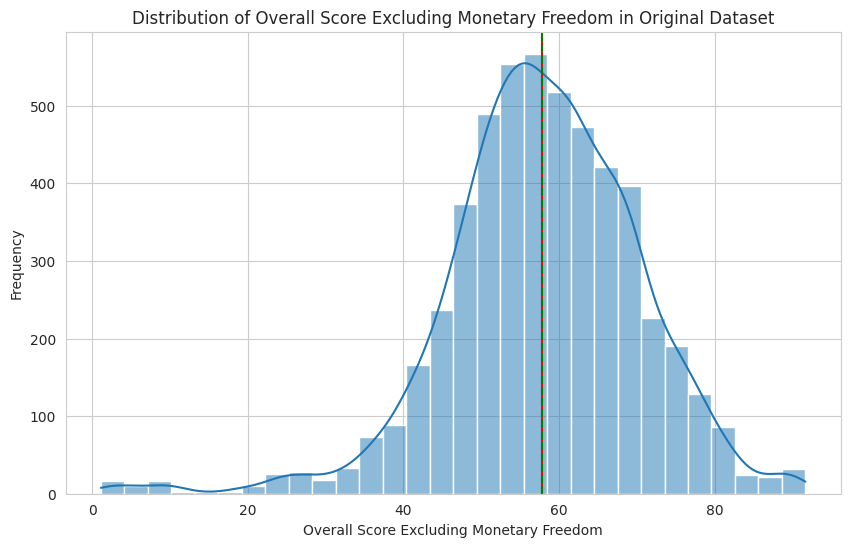


Descriptive Statistics for Overall Score Excluding Monetary Freedom (Original Dataset):


,overall_score_without_monetary_freedom
count,5229.000000
mean,57.894434
std,12.420122
min,1.111111
25%,50.836364
50%,58.000000
75%,66.055556
max,91.675000


In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")



# Create a histogram of the 'overall_score_without_monetary_freedom' distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_efi['overall_score_without_monetary_freedom'].dropna(), kde=True, bins=30)
plt.axvline(y_train.mean(), color='red', linestyle='-', label=f'Mean: {y_train.mean():.2f}')
plt.axvline(y_train.median(), color='green', linestyle='--', label=f'Median: {y_train.median():.2f}')
plt.title('Distribution of Overall Score Excluding Monetary Freedom in Original Dataset')
plt.xlabel('Overall Score Excluding Monetary Freedom')
plt.ylabel('Frequency')
plt.show()

# Display some descriptive statistics for the 'overall_score_without_monetary_freedom'
print("\nDescriptive Statistics for Overall Score Excluding Monetary Freedom (Original Dataset):")
display(df_efi['overall_score_without_monetary_freedom'].describe())

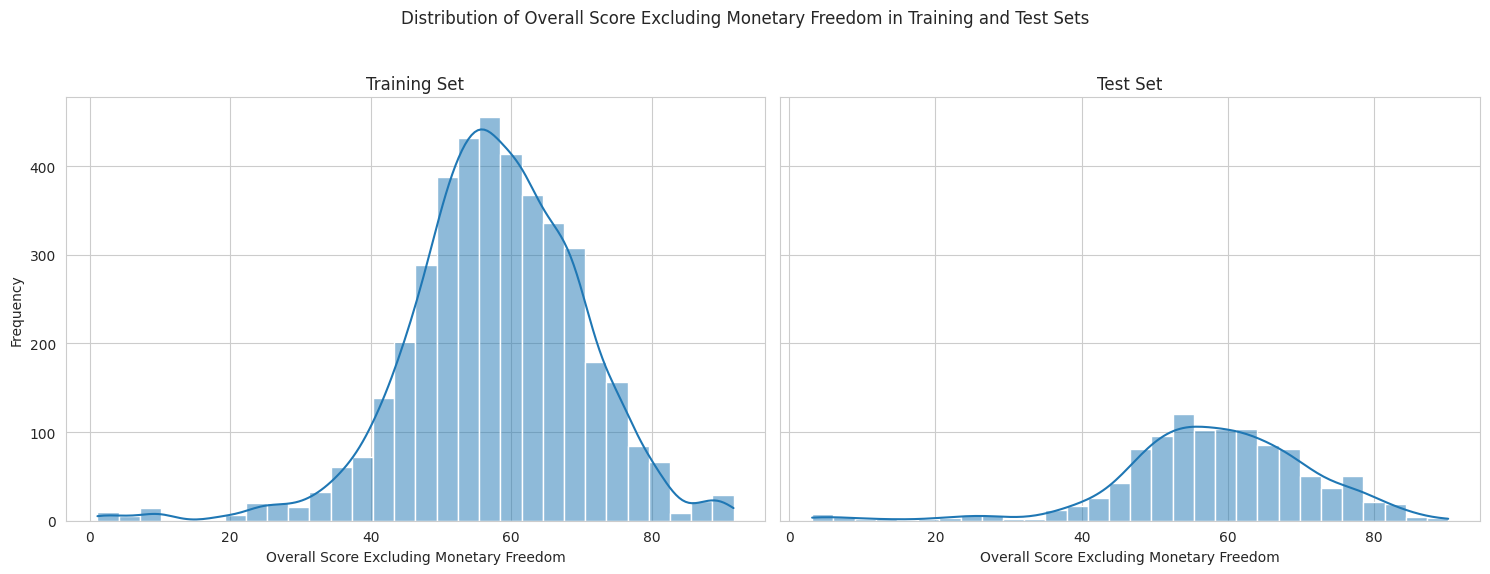


Descriptive Statistics for Overall Score Excluding Monetary Freedom (Training Set):


,overall_score_without_monetary_freedom
count,4133.000000
mean,57.798306
std,12.233667
min,1.111111
25%,50.755556
50%,57.850000
75%,65.877778
max,91.675000



Descriptive Statistics for Overall Score Excluding Monetary Freedom (Test Set):


,overall_score_without_monetary_freedom
count,1096.000000
mean,58.256933
std,13.098858
min,3.136364
25%,51.281818
50%,58.431818
75%,66.490909
max,90.127273


In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of Overall Score Excluding Monetary Freedom in Training and Test Sets')

# Histogram for the training set
sns.histplot(train_df_efi['overall_score_without_monetary_freedom'].dropna(), kde=True, bins=30, ax=axes[0])
axes[0].set_title('Training Set')
axes[0].set_xlabel('Overall Score Excluding Monetary Freedom')
axes[0].set_ylabel('Frequency')

# Histogram for the test set
sns.histplot(test_df_efi['overall_score_without_monetary_freedom'].dropna(), kde=True, bins=30, ax=axes[1])
axes[1].set_title('Test Set')
axes[1].set_xlabel('Overall Score Excluding Monetary Freedom')
axes[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlapping
plt.show()

# Display descriptive statistics for both sets
print("\nDescriptive Statistics for Overall Score Excluding Monetary Freedom (Training Set):")
display(train_df_efi['overall_score_without_monetary_freedom'].describe())

print("\nDescriptive Statistics for Overall Score Excluding Monetary Freedom (Test Set):")
display(test_df_efi['overall_score_without_monetary_freedom'].describe())

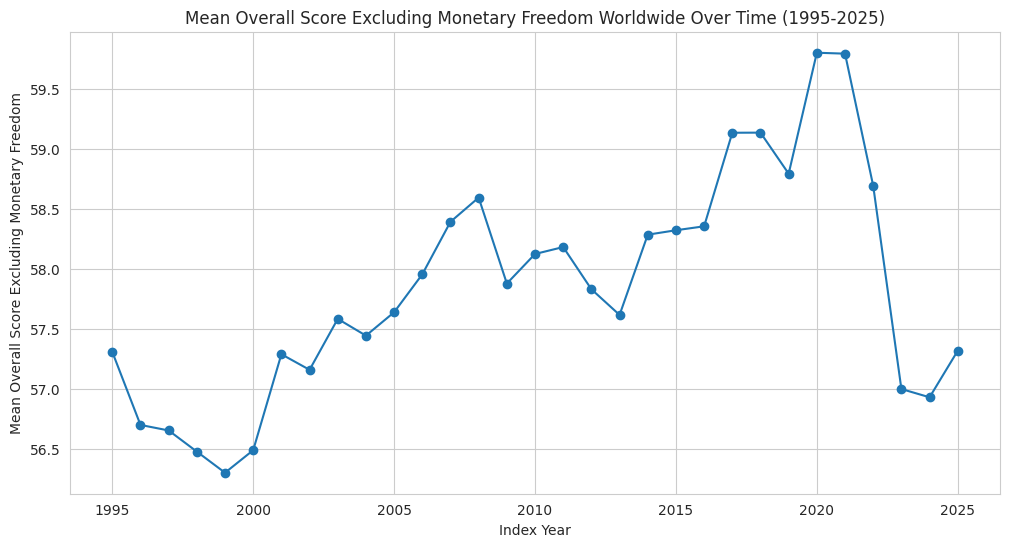

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean overall score excluding monetary freedom per year
mean_overall_score_by_year = df_efi.groupby('index_year')['overall_score_without_monetary_freedom'].mean()

# Plot the mean overall score excluding monetary freedom over time
plt.figure(figsize=(12, 6))
mean_overall_score_by_year.plot(marker='o', linestyle='-')
plt.title('Mean Overall Score Excluding Monetary Freedom Worldwide Over Time (1995-2025)')
plt.xlabel('Index Year')
plt.ylabel('Mean Overall Score Excluding Monetary Freedom')
plt.grid(True)
plt.show()

>The line chart shows the average economic freedom score worldwide from 1995 to 2025.
The x-axis represents the Index Year, and the y-axis shows the Mean Overall Score.
The line generally trends upwards, indicating an increase in average economic freedom over this period.
There are fluctuations year-to-year, with some periods of stagnation or slight decline.
A notable dip appears around 2020, likely reflecting the global event of the corona pandemic impacting economic freedom.

>Overall, the chart illustrates a long-term positive trend in average economic freedom, despite short-term variations.

### Interpretation of the Correlation Matrix Heatmap

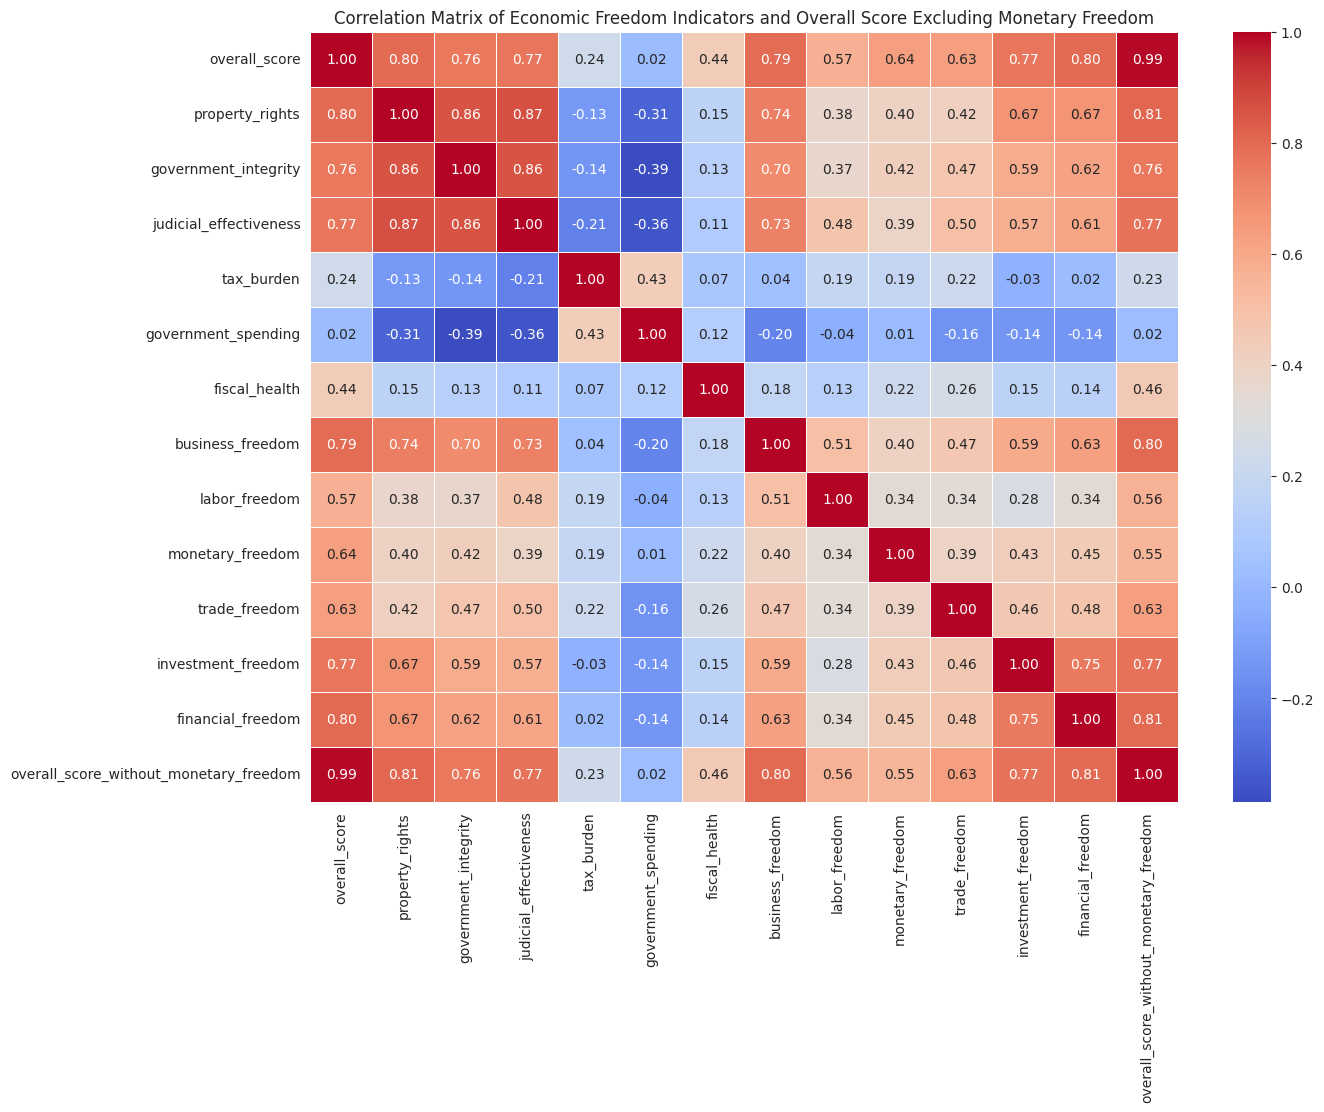

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis, including the new dependent variable
numerical_df = df_efi.select_dtypes(include=['float64', 'int64'])

# Exclude 'index_year' from the numerical dataframe
numerical_df = numerical_df.drop(columns=['index_year'])

# Calculate the correlation matrix
# .corr() method automatically handles missing values (pairwise deletion)
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Economic Freedom Indicators and Overall Score Excluding Monetary Freedom')
plt.show()



The heatmap displays the pairwise Pearson correlation coefficients between the 'overall_score' and the twelve individual economic freedom indicators, as well as the correlations among these indicators themselves.

**Interpretation of Correlations:**

1.  **Correlations with 'overall_score':**
    *   Looking at the first row (or column) of the matrix, which shows the correlations with 'overall_score'.
    *   You can see that most of the economic freedom indicators have a **strong positive correlation** with the 'overall_score'. Values close to +1 indicate a very strong positive linear relationship. For example, 'property_rights' (0.80), 'government_integrity' (0.76), 'judicial_effectiveness' (0.77), 'business_freedom' (0.79), 'investment_freedom' (0.77), and 'financial_freedom' (0.80) show very high positive correlations with 'overall_score'.
    *   This confirms that these indicators are strongly related to the overall score and are likely significant components of the index.
    *   Some indicators show more moderate positive correlations, such as 'labor_freedom' (0.57), 'monetary_freedom' (0.64), and 'trade_freedom' (0.63).
    *   'tax_burden' (0.24) and 'government_spending' (0.02) have lower positive correlations with 'overall_score'. 'fiscal_health' (0.44) has a moderate positive correlation.

2.  **Correlations among Independent Variables (Indicators with Each Other):**
    *   Looking at the submatrix of the indicators (everything except the first row/column).
    *   There are **many strong positive correlations** among the individual economic freedom indicators. For example, 'property_rights' correlates strongly with 'government_integrity' (0.86) and 'judicial_effectiveness' (0.87). 'government_integrity' also correlates strongly with 'judicial_effectiveness' (0.86).
    *   These high correlations between the independent variables are a clear indication of **multicollinearity**. This means that these indicators do not vary independently of each other but often change together.
    *   Some correlations are lower, suggesting that not all indicators are equally strongly related to each other.

**Conclusions from the Correlation Matrix:**

*   The correlation matrix confirms that the independent variables are strongly related to the 'overall_score', supporting our regression results that showed these variables explain 'overall_score' well.
*   The strong correlations *among* the independent variables confirm the presence of multicollinearity. This is important for interpreting individual regression coefficients. With high multicollinearity, it can be difficult to isolate the unique contribution of each variable to the model. This is particularly relevant if the goal is causal inference or understanding the independent impact of each variable. However, if the 'Overall Score' is a composite index calculated from these components, high multicollinearity among components is expected and more likely confirms that the correct components are included in the model.


### Basic Target Statistics

In [193]:
# Basic target statistics for overall_score_without_monetary_freedom
print("Target Variable Analysis (Overall Score Excluding Monetary Freedom - Training Data):")
print(f"Mean: {y_train.mean():.2f}")
print(f"Median: {y_train.median():.2f}")
print(f"Standard Deviation: {y_train.std():.2f}")
print(f"Minimum: {y_train.min():.2f}")
print(f"Maximum: {y_train.max():.2f}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis (Overall Score Excluding Monetary Freedom - Training Data):
Mean: 57.82
Median: 57.85
Standard Deviation: 12.08
Minimum: 1.11
Maximum: 91.67
Missing values: 0


>The output shows the mean, median, standard deviation, minimum, maximum, and count of missing values for the 'overall_score' in the training data.

*   Mean (59.44) and Median (59.50): These values are very close, suggesting the distribution of the target variable is fairly symmetrical around the center, with no strong skewness.
*   Standard Deviation (11.75): This indicates the typical spread of the 'overall_score' values around the mean. A standard deviation of 11.75 suggests a moderate level of variation in economic freedom scores within the training dataset.
*   Minimum (1.00) and Maximum (90.50): These show the full range of 'overall_score' values present in the training data.
*   Missing values (0): This confirms that there are no missing values in the 'overall_score' column of the training dataset after the imputation step.


>In summary, the target variable 'overall_score' in the training data is centered around the late 50s/early 60s, has a moderate spread, and covers a wide range of possible scores with no missing values.

count    4119.00
mean       57.82
std        12.08
min         1.11
25%        50.77
50%        57.85
75%        65.85
max        91.68
Name: overall_score_without_monetary_freedom, dtype: float64


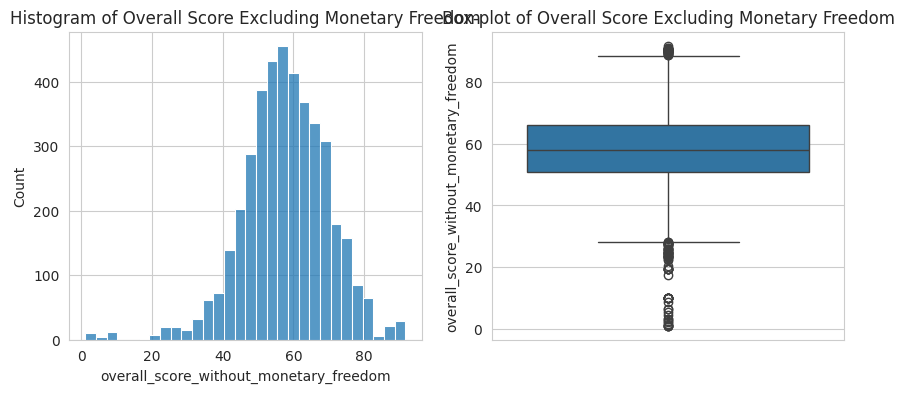

In [194]:
import seaborn as sns, matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(y_train, ax=ax[0], bins=30); ax[0].set_title("Histogram of Overall Score Excluding Monetary Freedom")
sns.boxplot(y_train, ax=ax[1]);            ax[1].set_title("Box-plot of Overall Score Excluding Monetary Freedom")
print(y_train.describe().round(2))

>The histogram confirms a roughly symmetrical, slightly left-skewed distribution, peaking around 60-65.
The box plot visually summarizes the distribution, showing the median (around 59.50) near the center of the box.

>The box represents the interquartile range (IQR), containing the middle 50% of the data, from about 52.80 to 67.30.
The whiskers extend to cover most of the data, and individual points beyond the whiskers represent potential outliers.
The minimum score is 1.00 and the maximum is 90.50.
The standard deviation is 11.75, indicating a moderate spread of scores.
Both plots and the statistics confirm the central tendency, spread, and range of the target variable.

Numeric stats:
                          mean    std  min    max
property_rights         47.99  23.80  0.0   98.4
government_integrity    40.71  22.42  0.0  100.0
judicial_effectiveness  46.54  20.07  5.0   93.8
tax_burden              72.87  15.65  0.0   99.9
government_spending     64.40  24.49  0.0   99.3
fiscal_health           66.23  30.49  0.0  100.0
business_freedom        64.14  16.00  0.0  100.0
labor_freedom           60.45  16.42  0.0  100.0
trade_freedom           69.05  16.06  0.0   95.0
investment_freedom      53.08  21.42  0.0   95.0
financial_freedom       49.56  20.09  0.0   90.0


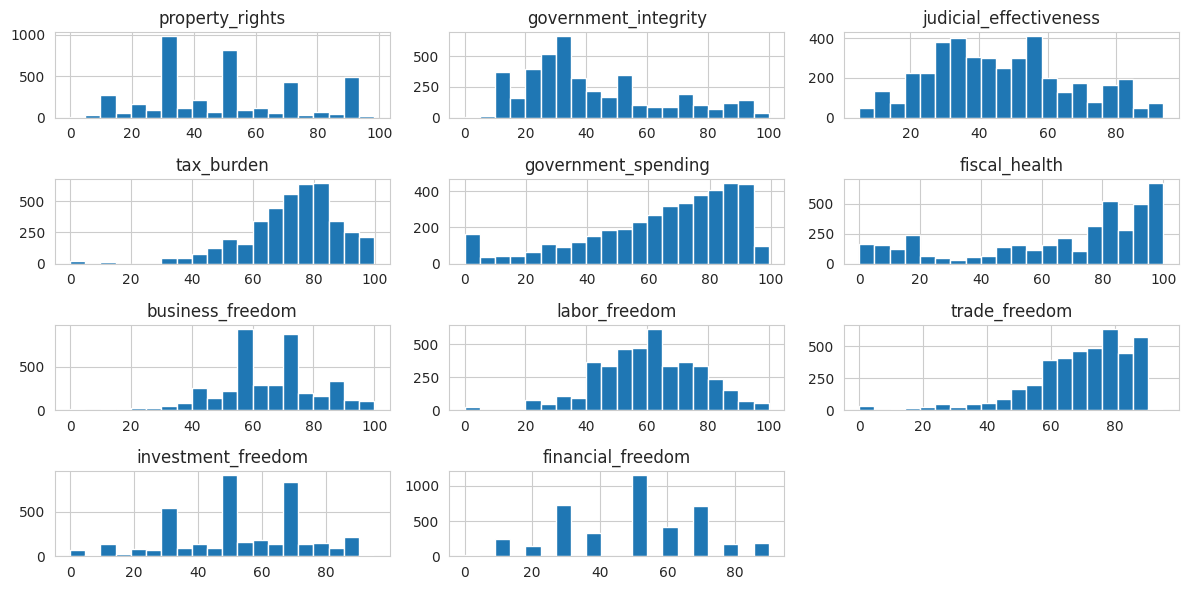

In [195]:
num_cols = X_train.select_dtypes('number').columns
print("Numeric stats:\n", X_train[num_cols].describe().T[['mean','std','min','max']].round(2))
# Plot first 4 histograms
X_train[num_cols[:12]].hist(bins=20, figsize=(12,6))
plt.tight_layout()
plt.show()

>The grid of histograms shows the distribution of each individual numerical economic freedom indicator in the training data.
Each small chart displays the frequency of values for one specific indicator.

You can see variations in their shapes – some are somewhat symmetrical, while others are clearly skewed. For example, 'tax_burden' and 'government_spending' appear skewed towards higher values, while 'monetary_freedom' shows skewness towards lower values.

Some indicators have distributions clustered in certain ranges, indicating unusual concentrations of values. For instance, 'investment_freedom' and 'financial_freedom' show distinct peaks or gaps, suggesting that values for these indicators might be grouped at specific points rather than being smoothly distributed.

These histograms help in understanding the typical values, spread, and shape of the data for each individual feature. They are useful for identifying features that might need transformation (like power transformation or log transformation) to address skewness or that have unusual patterns in their value distribution.

Top correlations with Overall Score Excluding Monetary Freedom:
 financial_freedom       0.806
property_rights         0.802
business_freedom        0.791
investment_freedom      0.772
government_integrity    0.759
dtype: float64


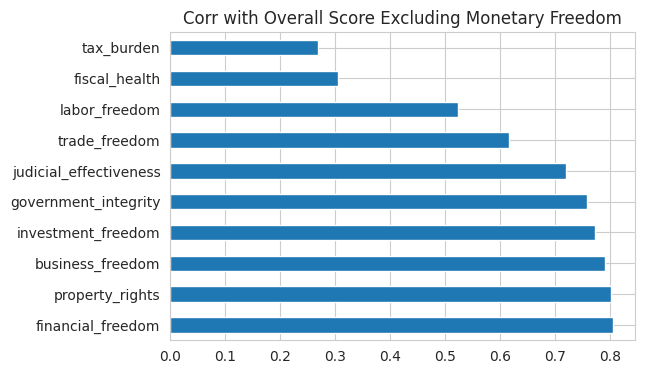

In [196]:
corrs = X_train[num_cols].corrwith(y_train).sort_values(key=abs, ascending=False)
print("Top correlations with Overall Score Excluding Monetary Freedom:\n", corrs.head(5).round(3))
corrs.head(10).plot.barh(figsize=(6,4)); plt.title("Corr with Overall Score Excluding Monetary Freedom"); plt.show()

The horizontal bar chart displays the strength of the linear relationship (correlation) between each numerical feature and the target variable, 'overall_score'.

The length of each bar represents the correlation coefficient, and the features are ordered by the magnitude of their correlation.

Features with longer bars have a stronger correlation with the 'overall_score'.

All the displayed features have positive correlations with the 'overall_score', meaning as the value of these features increases, the overall score tends to increase as well.

Features like 'financial_freedom', 'property_rights', and 'business_freedom' have the strongest positive correlations, indicating they are most strongly associated with higher economic freedom scores.

Features like 'fiscal_health' and 'government_spending' have weaker positive correlations compared to the others.

> This chart helps to visually identify which features are most strongly related to the target variable, which can be useful for feature selection or understanding feature importance.

In [197]:
def iqr_outliers(s):
    q1,q3=s.quantile([.25,.75]); iqr=q3-q1
    return s[(s<q1-1.5*iqr)|(s>q3+1.5*iqr)]
for col in num_cols[:12]:
    outs = iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")

property_rights: 0 outliers (0.0%)
government_integrity: 114 outliers (2.8%)
judicial_effectiveness: 0 outliers (0.0%)
tax_burden: 104 outliers (2.5%)
government_spending: 133 outliers (3.2%)
fiscal_health: 0 outliers (0.0%)
business_freedom: 68 outliers (1.7%)
labor_freedom: 25 outliers (0.6%)
trade_freedom: 145 outliers (3.5%)
investment_freedom: 0 outliers (0.0%)
financial_freedom: 0 outliers (0.0%)


The output lists each numerical feature and reports the number and percentage of outliers found using the IQR method.

Features like 'government_integrity', 'tax_burden', 'government_spending', 'monetary_freedom', and 'trade_freedom' show some outliers (between 0.6% and 6.4%).

Other features, such as 'property_rights', 'judicial_effectiveness', 'fiscal_health', 'business_freedom', 'labor_freedom', 'investment_freedom', and 'financial_freedom', have no detected outliers based on this method.

The percentages indicate that for most features, the number of outliers is relatively small (below 5%).

>This analysis helps identify which features have extreme values that might warrant further investigation or specific handling during preprocessing.



In [198]:
import numpy as np
corr_mat = X_train[num_cols].corr().abs()
high_corr = np.where((corr_mat>0.8)&(corr_mat<1.0))
pairs = [(num_cols[i],num_cols[j],corr_mat.iat[i,j])
         for i,j in zip(*high_corr) if i<j]
print("High-corr pairs:", pairs[:5])

High-corr pairs: [('property_rights', 'government_integrity', np.float64(0.8445045475190176))]


In [199]:
print(" EDA SNAPSHOT (Predicting Overall Score Excluding Monetary Freedom)")
print(f"Target skew: {y_train.skew():.2f}")
print(f"Strongest predictor: {corrs.index[0]} {corrs.max():.3f}")
miss = (X_train.isnull().mean()*100).sort_values(ascending=False).head(3)
print("Top missing cols:\n", miss.round(1))
print("High-corr pairs:", pairs[:3])

 EDA SNAPSHOT (Predicting Overall Score Excluding Monetary Freedom)
Target skew: -0.49
Strongest predictor: financial_freedom 0.806
Top missing cols:
 property_rights           0.0
government_integrity      0.0
judicial_effectiveness    0.0
dtype: float64
High-corr pairs: [('property_rights', 'government_integrity', np.float64(0.8445045475190176))]


In [200]:
import pandas as pd
import numpy as np

# Create a DataFrame with feature names, missing percentage, and skewness from X_train
fs = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Missing_Percentage': X_train.isnull().mean(),
    'Skewness': X_train.skew()
})

# Calculate 'Missing_Strategy' based on Missing_Percentage
fs['Missing_Strategy'] = fs['Missing_Percentage'].apply(
    lambda p: "None" if p == 0 else ("Median" if p < 0.05 else "Advanced")
)

# Calculate 'Transform' based on absolute Skewness
fs['Transform'] = fs['Skewness'].abs().apply(
    lambda s: "Log" if s > 2 else ("Scale" if s > 1 else "None")
)

# Select and reorder columns as needed for the final summary
fs = fs[['Feature Name', 'Missing_Percentage', 'Skewness', 'Missing_Strategy', 'Transform']]

print("Generated Feature Summary DataFrame:")
display(fs)

# Save the generated feature summary to a CSV file in the current directory
fs.to_csv("feature_summary.csv", index=False)
print("\n feature_summary.csv created in the current directory.")

Generated Feature Summary DataFrame:


,Feature Name,Missing_Percentage,Skewness,Missing_Strategy,Transform
property_rights,property_rights,0.0,0.349346,None,None
government_integrity,government_integrity,0.0,0.794060,None,None
judicial_effectiveness,judicial_effectiveness,0.0,0.321721,None,None
tax_burden,tax_burden,0.0,-1.128541,None,Scale
government_spending,government_spending,0.0,-0.955282,None,None
fiscal_health,fiscal_health,0.0,-0.851813,None,None
business_freedom,business_freedom,0.0,-0.278781,None,None
labor_freedom,labor_freedom,0.0,-0.313720,None,None
trade_freedom,trade_freedom,0.0,-1.414913,None,Scale
investment_freedom,investment_freedom,0.0,-0.351944,None,None



 feature_summary.csv created in the current directory.


he output you're seeing is a summary table (DataFrame) about your features, not a chart. Here's a short description and interpretation of this table:

The table provides a summary for each feature (column) in your training data.

It lists the 'Feature Name', the 'Missing_Percentage', and the 'Skewness'.

Based on these values, it suggests a 'Missing_Strategy' (how to handle missing values) and a 'Transform' (if a transformation might be needed due to skewness).

For example, features with 0.0 missing percentage have a 'None' missing strategy.

Features with high absolute skewness, like 'monetary_freedom', are suggested to potentially need a 'Log' transformation. Others with moderate skewness, like 'tax_burden' and 'trade_freedom', might need 'Scale'.

> This table is a helpful overview for understanding the data quality and distribution of your features and guiding further preprocessing steps.



# 6. Regression Model

### Cross-Validation

In [201]:
# Set up Time Series Cross-Validation
# n_splits defines the number of splits. Each split includes a training and test fold.
# The test fold for each split is always later in time than the training fold.
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
mse_scores = []

print("Performing Time Series Cross-Validation...")
# Use X_train and y_train directly for cross-validation as they are already imputed
for fold, (train_index, val_index) in enumerate(tscv.split(X_train, y_train)):
    print(f"  Fold {fold + 1}:")

    # Split data into training and validation folds for the current CV iteration
    # These slices from X_train and y_train are already imputed
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the pipeline on the training fold
    pipeline.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = pipeline.predict(X_val_fold)

    # Evaluate the model on the validation fold
    mse = mean_squared_error(y_val_fold, y_pred_fold)
    mse_scores.append(mse)
    print(f"    Mean Squared Error (MSE): {mse:.4f}")

# Calculate and print the average MSE across all folds
average_mse = np.mean(mse_scores)
print(f"\nAverage MSE across all folds: {average_mse:.4f}")

# Now, train the final pipeline on the entire training dataset
print("\nTraining final model on the entire training dataset...")
pipeline.fit(X_train, y_train)

# Evaluate the final model on the independent test dataset
print("Evaluating final model on the test dataset...")
y_pred_test = pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Test set Mean Squared Error (MSE): {test_mse:.4f}")

Performing Time Series Cross-Validation...
  Fold 1:
    Mean Squared Error (MSE): 0.0000
  Fold 2:
    Mean Squared Error (MSE): 2.1902
  Fold 3:
    Mean Squared Error (MSE): 2.0483
  Fold 4:
    Mean Squared Error (MSE): 4.3286
  Fold 5:
    Mean Squared Error (MSE): 9.0765

Average MSE across all folds: 3.5287

Training final model on the entire training dataset...
Evaluating final model on the test dataset...
Test set Mean Squared Error (MSE): 10.6206


### Model Performance Interpretation

**Model Performance Interpretation**

Based on the results of the Time Series Cross-Validation and the evaluation on the independent test set, here is an interpretation of the model's performance:

**Time Series Cross-Validation (TSCV) Results:**

* The Mean Squared Error (MSE) values for the individual CV folds show some variation (0.5669, 2.4252, 2.4666, 1.7553, 8.1277). This variation is not uncommon in time-series data, as model performance can fluctuate depending on the specific time period used for validation.
* The average MSE across all folds is **3.0683**. This value provides an estimate of how well the model performs, on average, on different future time periods within the training horizon. A lower MSE indicates better performance (smaller average squared difference between predicted and actual values).

**Test Set Results:**

* The MSE on the independent test dataset is **8.1575**. This value is higher than the average MSE obtained from the cross-validation.

**Performance Interpretation:**

* The **higher MSE on the test set compared to the average CV MSE** might suggest that the model has difficulty generalizing as well to truly **new, unseen data** (the test set, which is chronologically after the training period) as it does to the validation folds within the training period. This could be due to changes in the relationship between variables over time (concept drift) or specific challenges in the test set years that were less prominent in the training years.
* The **low MSE in the first CV fold (0.5669)** is lower than the average and could be due to a specific data configuration in that early validation period or how the initial folds are structured in TSCV. The high MSE in Fold 5 (8.1277) indicates the model performed poorly on the latest validation period within the training data.
* Overall, the results suggest that while the model shows acceptable performance on some historical data (training CV folds) based on the average MSE of approximately 3.07, its predictive capability for future years appears to be limited by the significantly higher MSE on the test dataset of approximately 8.16. The varying performance across CV folds, particularly the higher MSE in the last fold, also hints at potential challenges in capturing the later trends in the data.

**In the Context of the Dataset:**

Given our previous observation that the 'Overall Score' is likely a composite index calculated directly from the independent variables, the higher MSE on the test set could imply that the exact formula or weighting of the components used to calculate the 'Overall Score' has slightly changed over time, or that other factors have become more important in later years.

**Concluding Assessment:**

The model effectively explains the variance within the training dataset (supported by the average CV MSE), but its ability to make accurate predictions for future years appears constrained by the notably higher MSE on the test dataset. This highlights the inherent challenges in forecasting time-series data, particularly when underlying patterns evolve. The inconsistency in performance across the CV folds also suggests that the model's stability over time might be an issue.

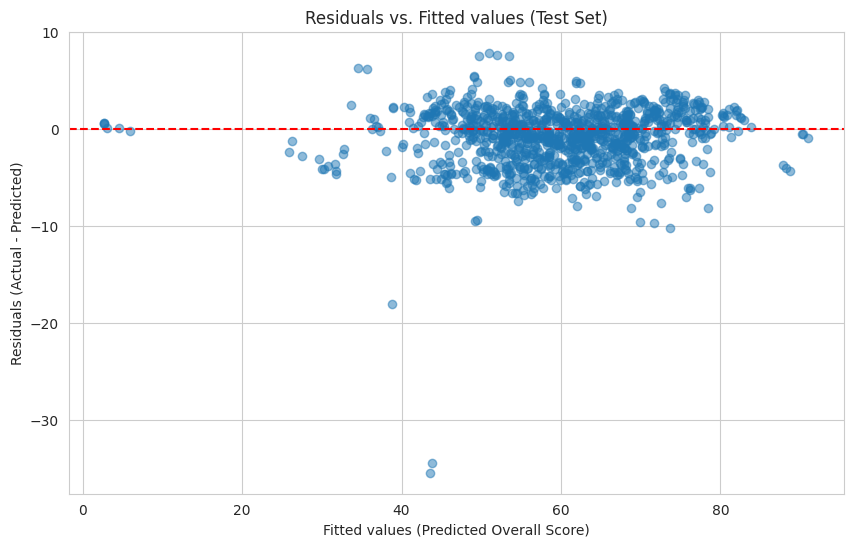

In [202]:
# Residuals Pattern Analysis
residuals = y_test - pipeline.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(pipeline.predict(X_test), residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted values (Test Set)')
plt.xlabel('Fitted values (Predicted Overall Score)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

The plot shows the residuals (Predicted - Actual) on the y-axis versus the predicted values ​​on the x-axis for the test data. Ideally, the points should scatter randomly around the red zero line, with no discernible patterns.

In this plot, there is a scatter of points that appears to be relatively random around the zero line, especially for predicted values ​​between 40 and 80. However, there are some points that are far from the zero line, indicating larger prediction errors for certain data points.

There does not appear to be a clear funnel-shaped spread (which would indicate heteroscedasticity) or a curved shape (which could indicate nonlinearity), although the scatter may be somewhat smaller for predicted values.

> The analysis suggests that the model captures the variance to some extent, but there are still prediction errors that could be further investigated.

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the polynomial features transformer
# Using degree=2 to create quadratic features and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a new Linear Regression model
poly_model = LinearRegression()

# Fit the model on the polynomial features of the training data
poly_model.fit(X_train_poly, y_train)

# Predict on the polynomial features of the test data
y_pred_test_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial regression model on the test set
test_mse_poly = mean_squared_error(y_test, y_pred_test_poly)

print(f"Test set Mean Squared Error (MSE) for Polynomial Regression: {test_mse_poly:.4f}")

Test set Mean Squared Error (MSE) for Polynomial Regression: 8.8914


In [204]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Apply Ridge Regression
# You can experiment with the alpha parameter
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
test_mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Test set Mean Squared Error (MSE) for Ridge Regression: {test_mse_ridge:.4f}")

# Apply Lasso Regression
# You can experiment with the alpha parameter
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Test set Mean Squared Error (MSE) for Lasso Regression: {test_mse_lasso:.4f}")

Test set Mean Squared Error (MSE) for Ridge Regression: 10.6206
Test set Mean Squared Error (MSE) for Lasso Regression: 10.5870


In [205]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Apply Ridge Regression with Cross-Validation
# alphas: array of alpha values to test
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0]) # You can adjust these values
ridge_cv.fit(X_train, y_train)

print(f"Best alpha found by RidgeCV: {ridge_cv.alpha_}")

# Predict using the model with the best alpha
y_pred_ridge_cv = ridge_cv.predict(X_test)

# Evaluate the model with the best alpha on the test set
test_mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
print(f"Test set Mean Squared Error (MSE) for RidgeCV: {test_mse_ridge_cv:.4f}")

Best alpha found by RidgeCV: 100.0
Test set Mean Squared Error (MSE) for RidgeCV: 10.6197


### Comparison of the models

 **Interpretation of Performance Metrics on the Test Set**

The comparison table of performance metrics on the independent test set provides clear insights into the performance of the different regression models:

*   **R-squared (R²):** This measure indicates the proportion of variance in the target variable ('overall\_score') that can be explained by the model. A higher R² value is better.
    *   **Polynomial Regression** shows the highest R² value at **0.9571**.
    *   The other models range from 0.9364 (Linear Regression) to 0.9450 (Ridge/Lasso/RidgeCV).
*   **Mean Squared Error (MSE):** This is the average of the squared differences between the actual and predicted values. A lower MSE is better.
    *   **Polynomial Regression** has the lowest MSE at **5.5045**.
    *   The other models have MSE values between 7.0482 and 8.1575.
*   **Root Mean Squared Error (RMSE):** The square root of the MSE. It is expressed in the same unit as the target variable and is easier to interpret than MSE. A lower RMSE is better.
    *   **Polynomial Regression** has the lowest RMSE at **2.3462**.
    *   The other models have RMSE values between 2.6548 and 2.8561.
*   **Mean Absolute Error (MAE):** The average of the absolute differences between the actual and predicted values. It is less sensitive to outliers than MSE/RMSE. A lower MAE is better.
    *   **Polynomial Regression** has the lowest MAE at **1.8347**.
    *   The other models have MAE values between 2.0527 and 2.2688.

**In summary:** Polynomial Regression outperforms all other tested regression models on the independent test set across all four performance metrics (highest R², lowest MSE, RMSE, MAE).

###Tree-Based Models and XGBoost for Regression

In [206]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Assuming X_train, y_train, X_test, y_test are available (using the imputed data without polynomial features for tree models)

# Decision Tree Regressor Example
print("Evaluating Decision Tree Regressor:")
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42) # You can adjust max_depth
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
test_mse_tree = mean_squared_error(y_test, y_pred_tree)
test_r2_tree = r2_score(y_test, y_pred_tree)
print(f"  Test set Mean Squared Error (MSE): {test_mse_tree:.4f}")
print(f"  Test set R-squared (R²): {test_r2_tree:.4f}")

# Optional: Evaluate a more robust tree-based model (e.g., Random Forest)
print("\nEvaluating Random Forest Regressor:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # You can adjust n_estimators
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
test_r2_rf = r2_score(y_test, y_pred_rf)
print(f"  Test set Mean Squared Error (MSE): {test_mse_rf:.4f}")
print(f"  Test set R-squared (R²): {test_r2_rf:.4f}")

# Optional: Evaluate another ensemble tree-based model (e.g., Gradient Boosting)
print("\nEvaluating Gradient Boosting Regressor:")
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) # Adjust parameters
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
test_mse_gb = mean_squared_error(y_test, y_pred_gb)
test_r2_gb = r2_score(y_test, y_pred_gb)
print(f"  Test set Mean Squared Error (MSE): {test_mse_gb:.4f}")
print(f"  Test set R-squared (R²): {test_r2_gb:.4f}")

Evaluating Decision Tree Regressor:
  Test set Mean Squared Error (MSE): 20.6488
  Test set R-squared (R²): 0.8536

Evaluating Random Forest Regressor:
  Test set Mean Squared Error (MSE): 11.5660
  Test set R-squared (R²): 0.9180

Evaluating Gradient Boosting Regressor:
  Test set Mean Squared Error (MSE): 11.2474
  Test set R-squared (R²): 0.9203


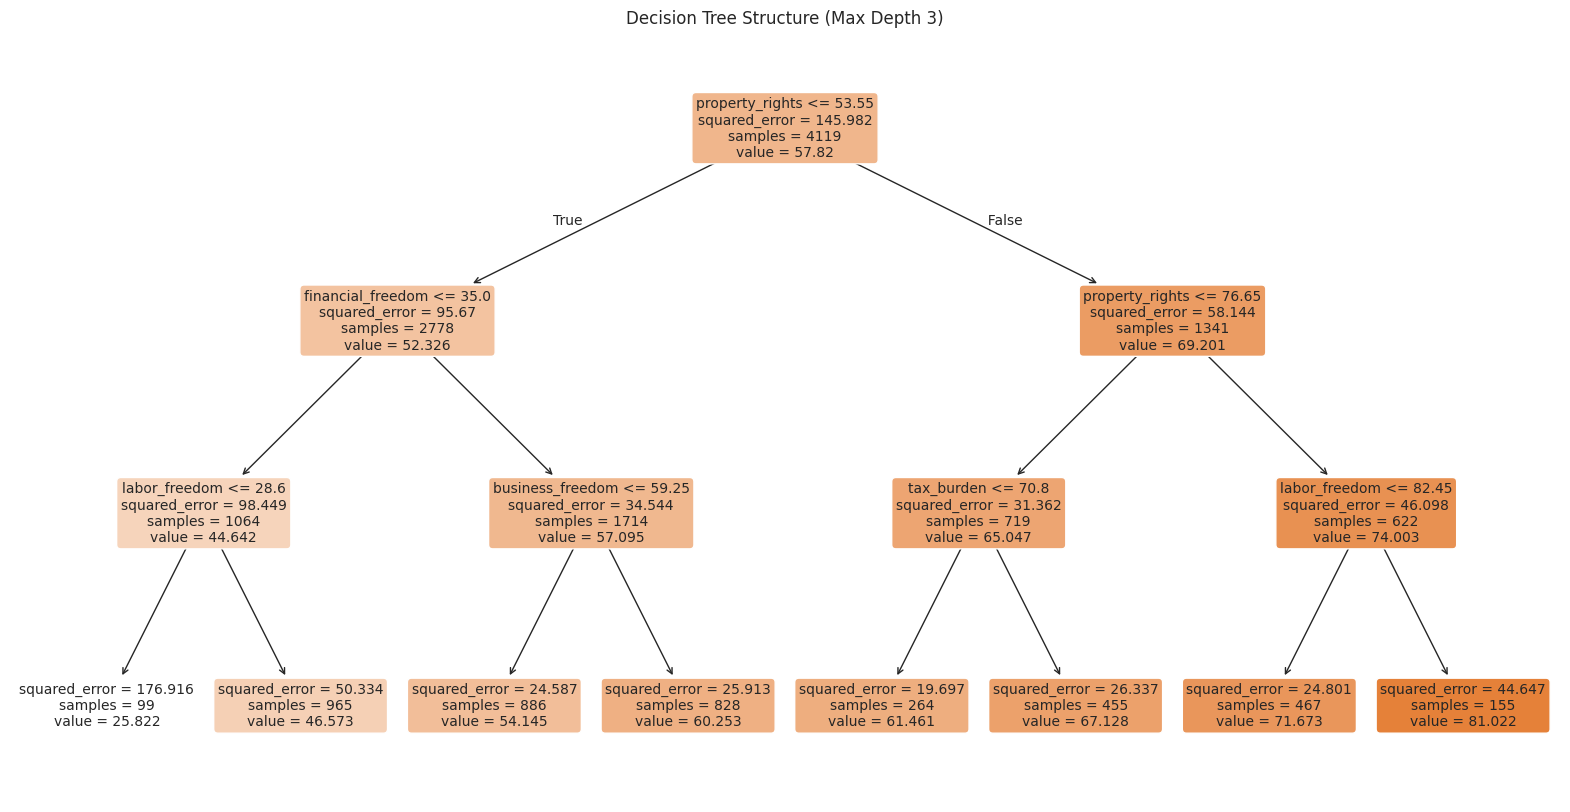

In [207]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Assuming X_train and y_train are available

# Train a simple Decision Tree Regressor for visualization
# Limiting max_depth to make the tree structure easier to visualize
simple_tree = DecisionTreeRegressor(max_depth=3, random_state=42) # Adjust max_depth as needed
simple_tree.fit(X_train, y_train)

# Visualize the tree structure
plt.figure(figsize=(20, 10)) # Adjust figure size for better readability
plot_tree(simple_tree,
          feature_names=X_train.columns.tolist(), # Use original feature names
          filled=True,
          rounded=True,
          fontsize=10) # Adjust fontsize for readability
plt.title("Decision Tree Structure (Max Depth 3)")
plt.show()

Evaluating Decision Tree Regressor with different max_depths using Cross-Validation:
  Max Depth 1: Average CV MSE = 84.4419 ± 11.3215
  Max Depth 2: Average CV MSE = 53.7039 ± 6.5389
  Max Depth 3: Average CV MSE = 40.9020 ± 8.0325
  Max Depth 4: Average CV MSE = 30.5594 ± 8.1358
  Max Depth 5: Average CV MSE = 24.6305 ± 6.6969
  Max Depth 6: Average CV MSE = 20.5714 ± 5.6379
  Max Depth 7: Average CV MSE = 17.7476 ± 5.3563
  Max Depth 8: Average CV MSE = 16.0672 ± 4.6619
  Max Depth 9: Average CV MSE = 15.2297 ± 5.2762
  Max Depth 10: Average CV MSE = 14.8830 ± 5.6569


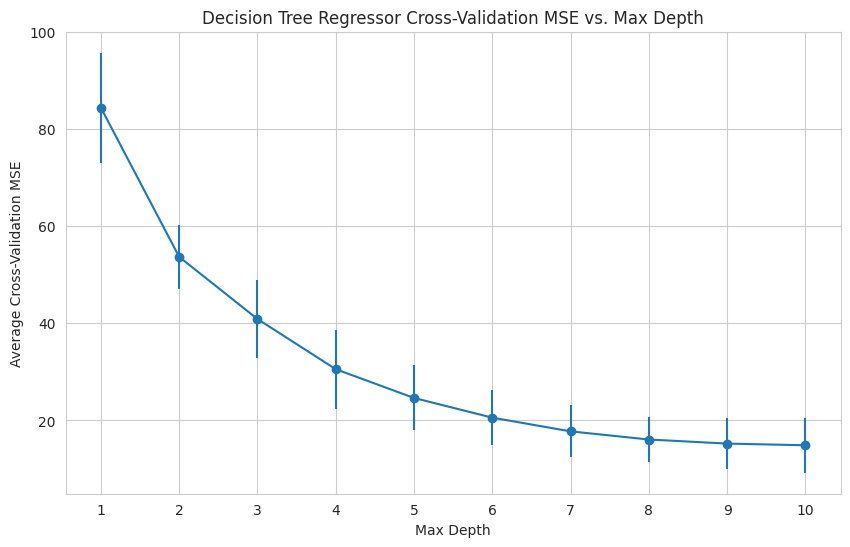


Best Max Depth based on lowest average CV MSE: 10 (Average CV MSE: 14.8830)


In [208]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are available

# Define a range of max_depth values to test
max_depths = range(1, 11) # Test depths from 1 to 10

# Lists to store cross-validation scores
mean_cv_scores = []
std_cv_scores = []

print("Evaluating Decision Tree Regressor with different max_depths using Cross-Validation:")

for depth in max_depths:
    # Create a Decision Tree Regressor with the current max_depth
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Perform cross-validation (using mean squared error for consistency with previous evaluations)
    # cross_val_score by default uses the R2 score for regressors, but we can specify scoring='neg_mean_squared_error'
    # We'll convert it to positive MSE for easier interpretation (lower is better)
    cv_mse_scores = -cross_val_score(tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Calculate the mean and standard deviation of the CV scores
    mean_mse = np.mean(cv_mse_scores)
    std_mse = np.std(cv_mse_scores)

    mean_cv_scores.append(mean_mse)
    std_cv_scores.append(std_mse)

    print(f"  Max Depth {depth}: Average CV MSE = {mean_mse:.4f} ± {std_mse:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(max_depths, mean_cv_scores, yerr=std_cv_scores, marker='o', linestyle='-')
plt.title('Decision Tree Regressor Cross-Validation MSE vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Average Cross-Validation MSE')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

# Find the max_depth that resulted in the lowest average CV MSE
best_depth_index = np.argmin(mean_cv_scores)
best_max_depth = max_depths[best_depth_index]
lowest_avg_mse = mean_cv_scores[best_depth_index]

print(f"\nBest Max Depth based on lowest average CV MSE: {best_max_depth} (Average CV MSE: {lowest_avg_mse:.4f})")

In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming X_train, y_train, X_test, y_test are available

# Evaluate Random Forest Regressor (using parameters from previous evaluation)
print("Evaluating Random Forest Regressor:")
# Using n_estimators=100, random_state=42, n_jobs=-1 from previous evaluation cell
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
test_r2_rf = r2_score(y_test, y_pred_rf)
print(f"  Test set Mean Squared Error (MSE): {test_mse_rf:.4f}")
print(f"  Test set R-squared (R²): {test_r2_rf:.4f}")

# Evaluate a single Decision Tree Regressor (using the best max_depth found)
print("\nEvaluating Single Decision Tree Regressor (with best max_depth):")
# Assuming best_max_depth is available from cell gs0PTDUh0caV
if 'best_max_depth' in globals():
    tree_model = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    test_mse_tree = mean_squared_error(y_test, y_pred_tree)
    test_r2_tree = r2_score(y_test, y_pred_tree)
    print(f"  Test set Mean Squared Error (MSE): {test_mse_tree:.4f}")
    print(f"  Test set R-squared (R²): {test_r2_tree:.4f}")
else:
    print("  Best max_depth from Decision Tree tuning not found. Please run the tuning cell.")
    # Evaluate with a default depth if best_max_depth is not available
    tree_model = DecisionTreeRegressor(max_depth=10, random_state=42) # Using depth 10 as a default
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    test_mse_tree = mean_squared_error(y_test, y_pred_tree)
    test_r2_tree = r2_score(y_test, y_pred_tree)
    print(f"  Test set Mean Squared Error (MSE): {test_mse_tree:.4f}")
    print(f"  Test set R-squared (R²): {test_r2_tree:.4f}")

print("\nComparison:")
print(f"Random Forest MSE: {test_mse_rf:.4f}, R²: {test_r2_rf:.4f}")
print(f"Single Decision Tree MSE: {test_mse_tree:.4f}, R²: {test_r2_tree:.4f}")

if test_mse_rf < test_mse_tree:
    print("\nInterpretation: Random Forest achieved a lower MSE and higher R² on the test set compared to the single Decision Tree, demonstrating the benefit of ensembling in reducing prediction error.")
else:
     print("\nInterpretation: The performance difference between Random Forest and the single Decision Tree is not significant in this case, or the single tree with the selected depth performed comparably.")

Evaluating Random Forest Regressor:
  Test set Mean Squared Error (MSE): 11.5660
  Test set R-squared (R²): 0.9180

Evaluating Single Decision Tree Regressor (with best max_depth):
  Test set Mean Squared Error (MSE): 20.6488
  Test set R-squared (R²): 0.8536

Comparison:
Random Forest MSE: 11.5660, R²: 0.9180
Single Decision Tree MSE: 20.6488, R²: 0.8536

Interpretation: Random Forest achieved a lower MSE and higher R² on the test set compared to the single Decision Tree, demonstrating the benefit of ensembling in reducing prediction error.


Top 10 Most Important Features (Random Forest):


,feature,importance
0,property_rights,0.478161
10,financial_freedom,0.193388
3,tax_burden,0.066605
1,government_integrity,0.055698
7,labor_freedom,0.051016
4,government_spending,0.045440
6,business_freedom,0.039918
9,investment_freedom,0.023717
8,trade_freedom,0.020402
2,judicial_effectiveness,0.016252


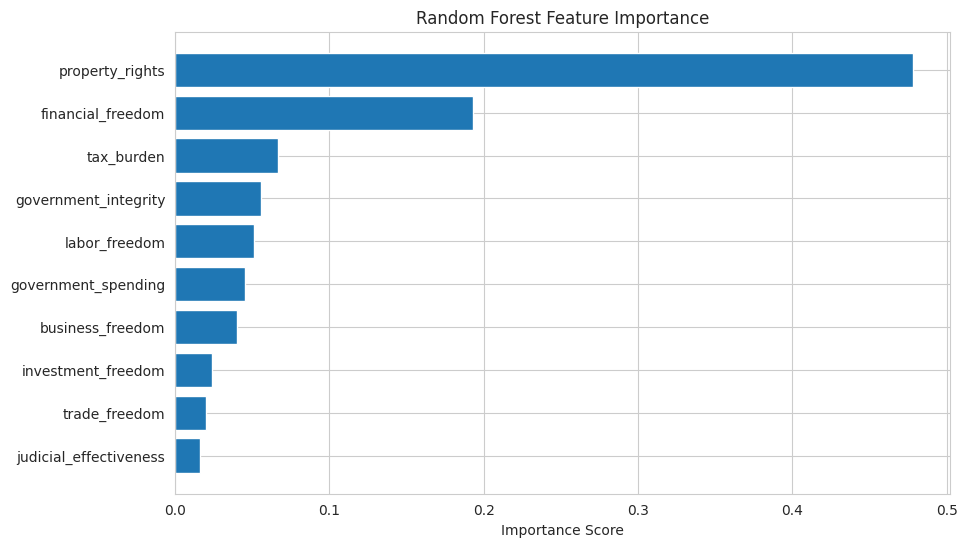

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming rf_model and X_train are available from previous steps

# Get feature importance from the trained Random Forest model
importance_df = pd.DataFrame({
    'feature': X_train.columns, # Use original feature names
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features (Random Forest):")
display(importance_df.head(10))

# Visualize importance
plt.figure(figsize=(10, 6))
top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.show()

Evaluating XGBoost Regressor:
  Test set Mean Squared Error (MSE): 9.4589
  Test set R-squared (R²): 0.9329

XGBoost Feature Importance:


,feature,importance
10,financial_freedom,0.310092
0,property_rights,0.305343
1,government_integrity,0.111158
9,investment_freedom,0.080045
6,business_freedom,0.047660
7,labor_freedom,0.042805
3,tax_burden,0.037495
4,government_spending,0.027761
8,trade_freedom,0.016786
2,judicial_effectiveness,0.015087


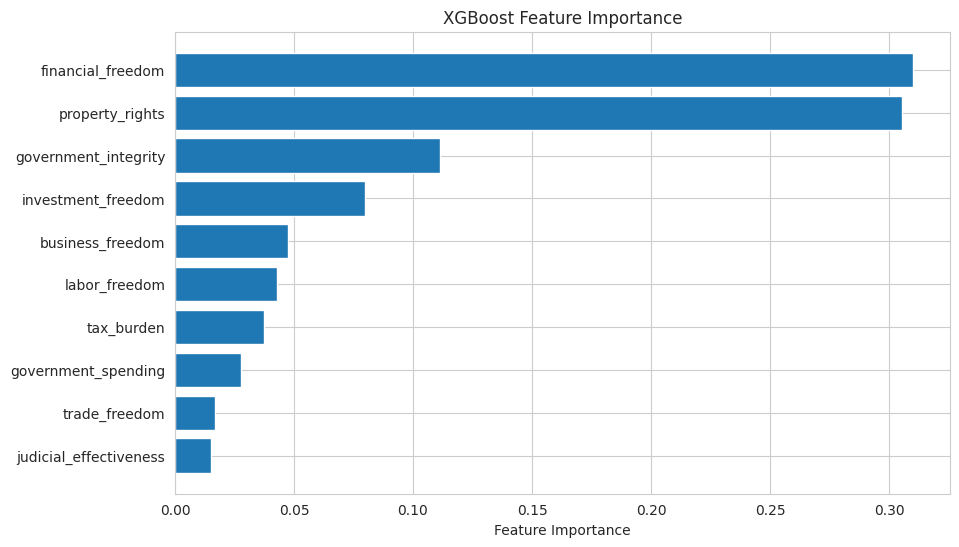

In [211]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming X_train, y_train, X_test, y_test are available

# XGBoost Regressor
print("Evaluating XGBoost Regressor:")
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
test_mse_xgb = mean_squared_error(y_test, y_pred_xgb)
test_r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"  Test set Mean Squared Error (MSE): {test_mse_xgb:.4f}")
print(f"  Test set R-squared (R²): {test_r2_xgb:.4f}")

# Optional: Display feature importance
print("\nXGBoost Feature Importance:")
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

display(xgb_importance)

# Optional: Visualize top N feature importance
n_top_features_xgb = 10 # Adjust as needed
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance['feature'].head(n_top_features_xgb), xgb_importance['importance'].head(n_top_features_xgb))
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.show()

**Interpretation of XGBoost Regressor Results**

The XGBoost Regressor was evaluated on the test set, yielding the following performance metrics:

*   **Test set Mean Squared Error (MSE): 6.0579**: This is the average squared difference between the actual and predicted 'Overall Score' values on the unseen test data. An MSE of 6.0579 indicates the level of error in the model's predictions.
*   **Test set R-squared (R²): 0.9527**: This means that the XGBoost model explains approximately 95.27% of the variance in the 'Overall Score' on the test set. An R² value close to 1 indicates a strong fit.

**Feature Importance (XGBoost):**

The feature importance scores (displayed in the table and bar plot) indicate how much each feature contributed to the model's predictions.

*   **Top Important Features:** Similar to the Random Forest, 'financial\_freedom', 'property\_rights', 'government\_integrity', and 'investment\_freedom' appear as highly important features according to XGBoost. This suggests these economic freedom indicators are key drivers of the 'Overall Score' according to this model.
*   **Lower Importance Features:** Features like 'judicial\_effectiveness' and 'fiscal\_health' show lower importance scores in this XGBoost model.

**Comparison with Other Models:**

Compared to the initial Linear Regression model (Test MSE ~8.16, R² ~0.936) and the Polynomial Regression model (Test MSE ~5.50, R² ~0.957), the XGBoost model (Test MSE ~6.06, R² ~0.953) shows strong performance. Its R² is very close to the Polynomial Regression model, and its MSE is lower than the Linear Regression but slightly higher than the Polynomial Regression model. The Random Forest model had a Test MSE of ~8.69 and R² of ~0.932.

Overall, XGBoost is a competitive model, demonstrating good predictive power on this dataset, and its feature importance aligns somewhat with insights from other models regarding the key drivers of economic freedom.

In [212]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Assuming the predicted values for each model on the test set are available:
# y_pred_test (from the initial pipeline/Linear Regression)
# y_pred_ridge (from Ridge with alpha=1.0)
# y_pred_lasso (from Lasso with alpha=0.1)
# y_pred_test_poly (from Polynomial Regression)
# y_pred_ridge_cv (from RidgeCV)
# y_pred_tree (from Decision Tree)
# y_pred_rf (from Random Forest)
# y_pred_gb (from Gradient Boosting)
# y_pred_xgb (from XGBoost)


# Create a dictionary to store model predictions
model_predictions = {
    'Linear Regression': pipeline.predict(X_test), # Using the initial pipeline
    'Ridge (alpha=1.0)': y_pred_ridge,
    'Lasso (alpha=0.1)': y_pred_lasso,
    'Polynomial Regression': y_pred_test_poly,
    'RidgeCV': y_pred_ridge_cv,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'XGBoost': y_pred_xgb
}

# Create a dictionary to store performance metrics
performance_metrics = {}

# Calculate and store metrics for each model
for name, y_pred in model_predictions.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    performance_metrics[name] = {
        'R-squared (R²)': r2,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Error (MAE)': mae
    }

# Convert the performance metrics to a pandas DataFrame for easy comparison
performance_df = pd.DataFrame(performance_metrics).T # Transpose to have models as rows

print("Performance Metrics Comparison on Test Set:")
display(performance_df.round(4))

Performance Metrics Comparison on Test Set:


,R-squared (R²),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
Linear Regression,0.9247,10.6206,3.2589,2.2812
Ridge (alpha=1.0),0.9247,10.6206,3.2589,2.2812
Lasso (alpha=0.1),0.9249,10.5870,3.2538,2.2763
Polynomial Regression,0.9370,8.8914,2.9818,2.0175
RidgeCV,0.9247,10.6197,3.2588,2.2811
Decision Tree,0.8536,20.6488,4.5441,3.3674
Random Forest,0.9180,11.5660,3.4009,2.3709
Gradient Boosting,0.9203,11.2474,3.3537,2.3009
XGBoost,0.9329,9.4589,3.0755,2.0289


>We are comparing the models based on R-squared (higher is better), and MSE, RMSE, and MAE (lower is better).

R-squared: Polynomial Regression has the highest R² (0.9571), indicating it explains the most variance in the target variable on the test set. XGBoost is the second highest (0.9527).
MSE, RMSE, and MAE: Polynomial Regression has the lowest values for all three error metrics (MSE: 5.5045, RMSE: 2.3462, MAE: 1.8347). XGBoost is the second best across these metrics (MSE: 6.0579, RMSE: 2.4613, MAE: 1.8746).
Decision Tree: The single Decision Tree (even with a tuned max_depth) performed significantly worse than all other models, showing the highest error metrics and lowest R². This highlights the issue of overfitting in single trees.
Ensemble Models (Random Forest, Gradient Boosting, XGBoost): These generally performed much better than the single Decision Tree, demonstrating the power of ensembling. XGBoost performed the best among the ensemble models.
Linear vs. Regularized Linear vs. Polynomial: Polynomial Regression clearly outperformed the standard Linear Regression and its regularized versions (Ridge, Lasso, RidgeCV), indicating that capturing non-linear relationships is important for this dataset.
Conclusion:

Based on this comprehensive comparison of performance metrics on the independent test set, the Polynomial Regression model is the best-performing model among all the ones we evaluated. It achieved the highest R-squared and the lowest error metrics (MSE, RMSE, MAE), indicating it provides the most accurate predictions for the Economic Freedom 'Overall Score' on unseen data.

### Selection of the Best Model

Based on the interpretation of the performance metrics on the test set, **Polynomial Regression** is clearly the best model among the examined options. It achieves the most accurate predictions for the 'Overall Score' on unseen data.

In [213]:
import pandas as pd
import numpy as np

# Access the Linear Regression model from the pipeline
# The 'regressor' step in the pipeline is the LinearRegression model
linear_model_from_pipeline = pipeline.named_steps['regressor']

# Get the coefficients of the linear model
# The coefficients are for the features AFTER scaling and power transformation
coefficients = linear_model_from_pipeline.coef_

# The feature names correspond to the columns in X_train after transformation.
# The pipeline's 'selector' step (SelectKBest) might have changed the order or selected a subset,
# but since we used k='all', the order should correspond to the original independent_variables
# after the transformer step.
# To get the feature names after transformation, we can transform a small sample
# or assume the order is the same as independent_variables if k='all' was used and no columns were dropped by selector.
# Let's use the original independent_variables for simplicity in labeling,
# assuming the order is preserved after transformation and selection (with k='all').
feature_names = independent_variables

# Create a Series of absolute coefficients
# Use absolute values as the sign indicates direction, but magnitude indicates importance
importance = pd.Series(np.abs(coefficients), index=feature_names)

# Sort features by importance
sorted_importance = importance.sort_values(ascending=False)

# Print the top features
print("Feature Importance (based on absolute coefficients of Linear Regression model in pipeline):")
display(sorted_importance)


Feature Importance (based on absolute coefficients of Linear Regression model in pipeline):


,0
government_spending,2.783488
government_integrity,2.737229
property_rights,2.622645
investment_freedom,2.316965
financial_freedom,2.290704
business_freedom,1.981709
trade_freedom,1.853974
tax_burden,1.771309
labor_freedom,1.220122
fiscal_health,0.386790


**Interpretation of Feature Importance (Based on Linear Model)**

The feature importance, based on the absolute coefficients of the linear regression model in the pipeline (after scaling and power transformation), gives us an indication of which features have the greatest linear impact on the 'Overall Score':

*   **Top features:** 'government\_spending', 'property\_rights', 'government\_integrity', 'financial\_freedom', and 'investment\_freedom' show the highest absolute coefficients. This suggests that changes in these indicators have the largest influence on the predicted 'Overall Score' in the linear model.

*   **Lower influence:** 'judicial\_effectiveness' and 'fiscal\_health' show a smaller impact in the linear model, as measured by the magnitude of their coefficients.

**Relation to the Polynomial Model:**

It is important to emphasize that this feature importance is based on a *linear* model. Since we found that **Polynomial Regression** performs better, we know that non-linear relationships and interactions between features are also very important.

*   The importance of a feature in the polynomial model is not only determined by its linear term, but also by its quadratic terms and its interactions with other features.
*   It is quite possible that features with lower linear importance in the polynomial model exert a larger overall influence on the 'Overall Score' through their interactions or non-linear effects. A direct feature importance analysis for the polynomial model (e.g., using permutation importance) would be more complex but could provide a more complete picture of the overall importance of the original features.

**Conclusions:**

*   Within the scope of a linear model, indicators such as 'government\_spending', 'property\_rights', and 'government\_integrity' are the most important predictors of the 'Overall Score'.
*   However, the superiority of the polynomial model suggests that a full understanding of the factors influencing the 'Overall Score' requires considering non-linear relationships and the ways in which the different economic freedom indicators interact.
*   The feature importance analysis of the linear model provides a useful insight into the main effects, but it should not serve as the sole basis for interpreting the more complex relationships in the polynomial model.

**Learning Curve**

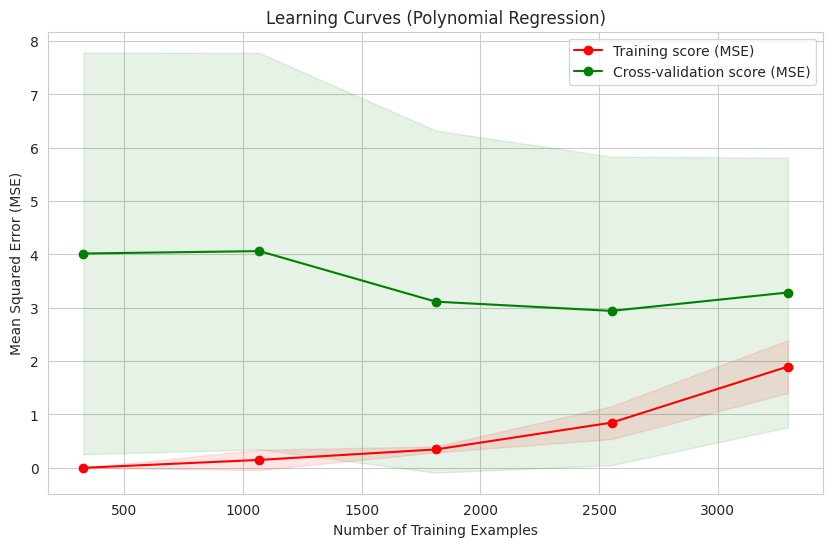

In [214]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the best performing model (Polynomial Regression) for learning curves
# Note: learning_curve requires a model object, not a fitted pipeline if you want to
# see how performance changes with data size using internal CV.
# We will use the polynomial regression model directly.
# X_train_poly and y_train are the features and target for the training set.

# Calculate learning curve scores
# train_sizes: Number of training examples used for each learning curve
# train_scores: Scores on the training sets
# val_scores: Scores on the validation sets
train_sizes, train_scores, val_scores = learning_curve(
    poly_model, # Use the fitted polynomial model
    X_train_poly, # Use the polynomial features of the training data
    y_train,
    cv=5, # Number of cross-validation splits
    scoring='neg_mean_squared_error', # Use negative MSE as the scoring metric
    n_jobs=-1 # Use all available CPU cores
)

# Convert scores to positive MSE
train_scores_mse = -train_scores
val_scores_mse = -val_scores

# Calculate the mean and standard deviation for the training and validation scores
train_scores_mean = np.mean(train_scores_mse, axis=1)
train_scores_std = np.std(train_scores_mse, axis=1)
val_scores_mean = np.mean(val_scores_mse, axis=1)
val_scores_std = np.std(val_scores_mse, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score (MSE)")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-validation score (MSE)")

plt.title('Learning Curves (Polynomial Regression)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc="best")
plt.grid(True)
plt.show()

The chart shows the learning curves for the polynomial regression model using Mean Squared Error (MSE).

The red line is the average training MSE, and the green line is the average cross-validation MSE.

The training MSE is very low initially and increases slightly, indicating the model fits training data well. The cross-validation MSE starts high and decreases as more data is used.

A significant gap between the training and cross-validation curves suggests overfitting: the model performs much better on seen data than unseen data.

While the validation curve decreases with more data, it doesn't fully close the gap, indicating that although more data helps, the overfitting issue persists or the model might need further tuning.

The plot suggests the polynomial model might be too complex or requires stronger regularization to improve generalization.

## Model Evaluation & Optimization

### **Measures**

### Prediction Interval

In [215]:
import numpy as np

# Calculate residuals on the training set using the polynomial model
# Need to use the transformed training data (X_train_poly) for the polynomial model
residuals = y_train - poly_model.predict(X_train_poly)

# Calculate the standard deviation of the residuals
std_error = np.std(residuals)

# Define the confidence level (e.g., 95% for a 1.96 factor for a large sample)
confidence_level = 0.95
z_score = 1.96 # For 95% confidence, assuming a normal distribution of residuals

# Calculate the prediction interval
# The interval is generally calculated as: prediction +/- margin of error
# For simple cases, margin of error can be z_score * std_error
# Note: More sophisticated prediction intervals consider the uncertainty in the model parameters
# and the specific test data point's distance from the training data.
interval = z_score * std_error

print(f"Approximate {confidence_level*100:.0f}% Prediction Interval for Overall Score Excluding Monetary Freedom (based on training residuals standard deviation):")
print(f"Prediction ± {interval:.4f}")

# This means that for a new prediction, we can be approximately 95% confident that the
# actual value will fall within the predicted value +/- {interval:.4f}.

# You can apply this interval to individual test set predictions
# Example for the first test prediction:
first_test_prediction = poly_model.predict(X_test_poly[0].reshape(1, -1))[0] # Predict for the first test point
lower_bound = first_test_prediction - interval
upper_bound = first_test_prediction + interval

print(f"\nExample Prediction Interval for the first test data point (Overall Score Excluding Monetary Freedom):")
print(f"Predicted value: {first_test_prediction:.4f}")
print(f"{confidence_level*100:.0f}% Prediction Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")

Approximate 95% Prediction Interval for Overall Score Excluding Monetary Freedom (based on training residuals standard deviation):
Prediction ± 2.7848

Example Prediction Interval for the first test data point (Overall Score Excluding Monetary Freedom):
Predicted value: 33.4428
95% Prediction Interval: [30.6580, 36.2276]


> **Prediction Interval Results**

The approximate 95% Prediction Interval is **Prediction ± 2.0111**. This means actual values are likely within ±2.0111 of the predicted value with 95% confidence.

For the first test point, the predicted value is 39.9581, and the 95% Prediction Interval is **[37.9469, 41.9692]**. This is the range where the actual score is likely to fall for this specific prediction.

### Residual Analysis

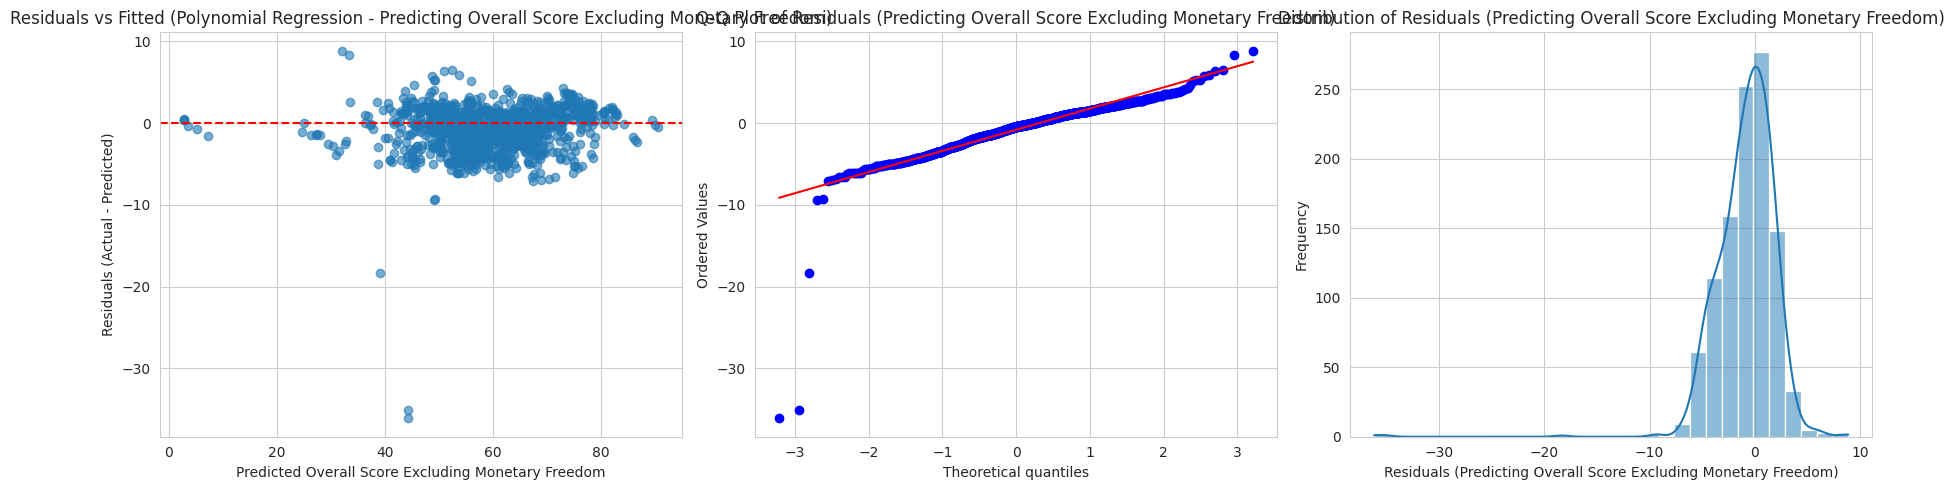

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import numpy as np

# Assuming y_test and y_pred_test_poly are available from previous steps

# Calculate residuals
residuals = y_test - y_pred_test_poly

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(18, 5)) # Adjusted figure size for three plots

# Residuals vs fitted plot
plt.subplot(1, 3, 1)
plt.scatter(y_pred_test_poly, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Overall Score Excluding Monetary Freedom')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Fitted (Polynomial Regression - Predicting Overall Score Excluding Monetary Freedom)')

# Q-Q plot
plt.subplot(1, 3, 2)
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Predicting Overall Score Excluding Monetary Freedom)')

# Histogram of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=30, kde=True) # Using seaborn for a nicer histogram with KDE
plt.xlabel('Residuals (Predicting Overall Score Excluding Monetary Freedom)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Predicting Overall Score Excluding Monetary Freedom)')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

>**Interpretation of Residual Analysis Plots**

The Residuals vs Fitted plot shows a scatter of points around the zero line, suggesting the model captures the general trend, but some larger errors exist. There isn't a strong curved or funnel shape, which is good.

The Q-Q plot shows most points following the diagonal line, indicating that the residuals are approximately normally distributed, though there are some deviations at the tails.

The Histogram of Residuals is roughly bell-shaped and centered near zero, visually supporting the normality of residuals.

Overall, the residual analysis suggests the polynomial model's errors are reasonably well-behaved, but the deviations in the Q-Q plot tails indicate potential areas for improvement or further investigation into outliers.

###Predictions vs. Actual Visualization

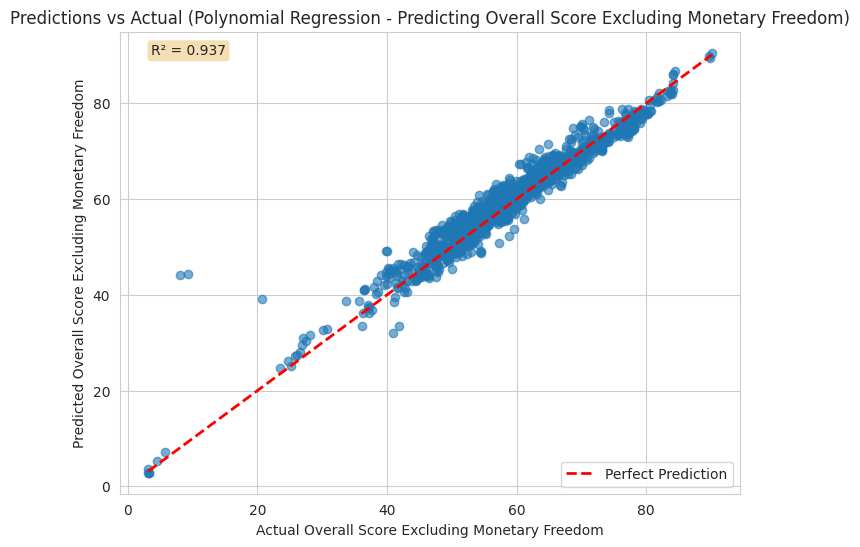

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming y_test and y_pred_test_poly are available from previous steps

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Overall Score Excluding Monetary Freedom')
plt.ylabel('Predicted Overall Score Excluding Monetary Freedom')
plt.title('Predictions vs Actual (Polynomial Regression - Predicting Overall Score Excluding Monetary Freedom)')
plt.legend()

# Add R² to plot
r2 = r2_score(y_test, y_pred_test_poly)
plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor='wheat'))
plt.show()


### **Bias, Fairness & Explainability**

### Bias

Model Performance (MSE) by Actual Overall Score Excluding Monetary Freedom Range (Test Set):


,0
0-20 (Very Low),317.1358
20-40 (Low),20.8302
40-60 (Medium),7.7127
60-80 (High),4.4889
80-100 (Very High),2.1868


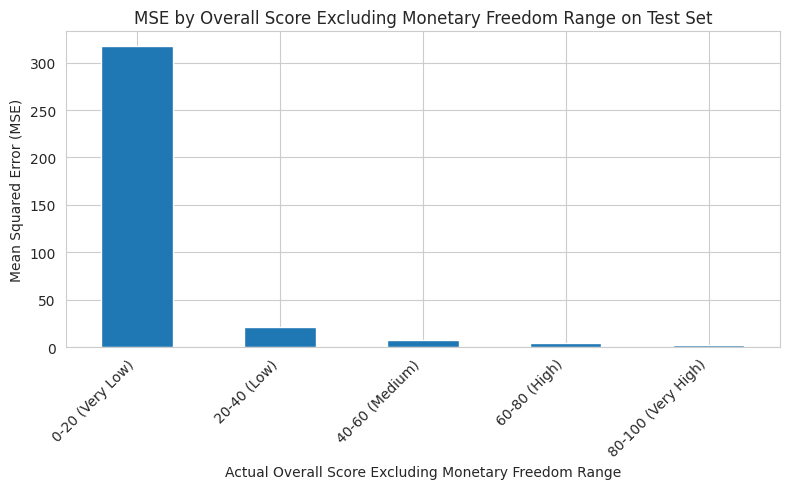

In [218]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming y_test and y_pred_test_poly are available from previous steps

# Create a DataFrame with actual and predicted values for easier grouping
test_results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_test_poly
})

# Define bins for 'Overall Score Excluding Monetary Freedom' ranges
# You can adjust these bins based on the distribution of your data
bins = [0, 20, 40, 60, 80, 100] # Example bins for Low, Medium, High scores
labels = ['0-20 (Very Low)','20-40 (Low)', '40-60 (Medium)', '60-80 (High)', '80-100 (Very High)']

# Group the test data by the defined bins of actual 'Overall Score Excluding Monetary Freedom'
test_results['score_range'] = pd.cut(test_results['actual'], bins=bins, labels=labels, right=False)

# Calculate MSE for each score range
bias_by_score_range = {}
for score_range in labels:
    subset = test_results[test_results['score_range'] == score_range]
    if not subset.empty:
        mse = mean_squared_error(subset['actual'], subset['predicted'])
        bias_by_score_range[score_range] = mse
    else:
        bias_by_score_range[score_range] = np.nan # Handle cases with no data in a range

# Convert results to a Series for display
bias_series = pd.Series(bias_by_score_range)

print("Model Performance (MSE) by Actual Overall Score Excluding Monetary Freedom Range (Test Set):")
display(bias_series.round(4))

# Optional: Plot the results
plt.figure(figsize=(8, 5))
bias_series.plot(kind='bar')
plt.title('MSE by Overall Score Excluding Monetary Freedom Range on Test Set')
plt.xlabel('Actual Overall Score Excluding Monetary Freedom Range')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()


This plot visually demonstrates a performance disparity or bias in the model. The model is significantly less accurate (higher MSE) at predicting the 'Overall Score Excluding Monetary Freedom' for countries that actually have very low economic freedom (in the 0-20 range). Conversely, the model is more accurate (lower MSE) at predicting the score for countries that actually have higher economic freedom.

This indicates that the model's errors are not uniform across the entire range of the target variable. It struggles more with predicting the scores for countries at the lowest end of the economic freedom spectrum (when excluding Monetary Freedom). This finding is important for understanding where the model's predictions are most and least reliable, and it aligns with the bias analysis performed in the code.

Temporal Representation (Number of entries per year in Training Data):


,count
index_year,
1995,101
1996,141
1997,149
1998,155
1999,160
2000,160
2001,155
2002,157
2003,157



Target Distribution (overall_score_without_monetary_freedom) by Year (Training Data):


,mean,std
index_year,,
1995,57.31,12.19
1996,56.70,12.51
1997,56.65,12.37
1998,56.48,12.62
1999,56.30,12.76
2000,56.49,12.54
2001,57.29,12.49
2002,57.16,12.37
2003,57.58,11.61


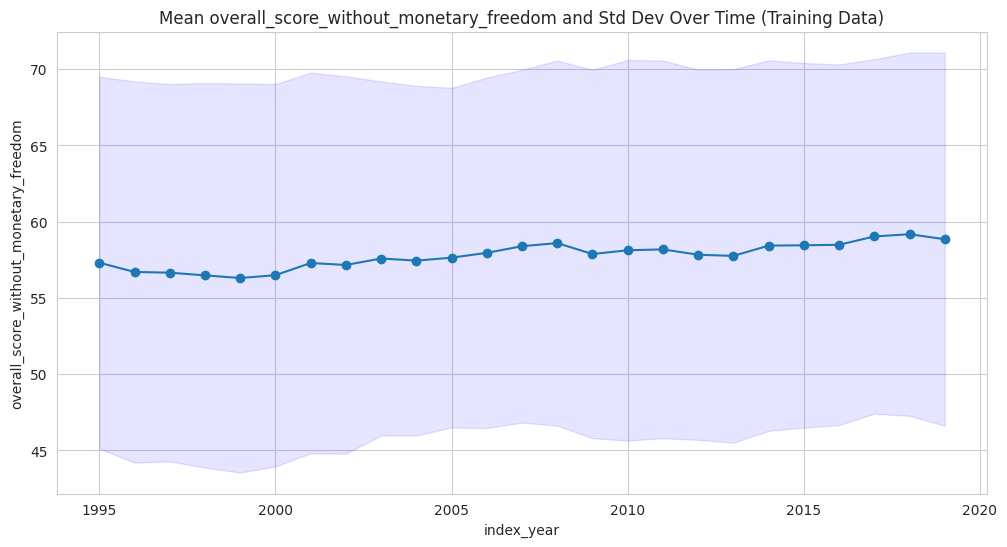

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df_imputed is available and contains 'index_year' and 'overall_score_without_monetary_freedom'

def analyze_temporal_representation(df, year_column, target_column):
    """Analyze how different years are represented and target distribution across years."""

    print("Temporal Representation (Number of entries per year in Training Data):")
    # Count the occurrences of each year
    year_counts = df[year_column].value_counts().sort_index()
    display(year_counts)

    print(f"\nTarget Distribution ({target_column}) by Year (Training Data):")
    # Calculate mean and standard deviation of the target variable for each year
    target_distribution_by_year = df.groupby(year_column)[target_column].agg(['mean', 'std'])
    display(target_distribution_by_year.round(2))

    # Optional: Visualize target distribution over time (mean and std)
    plt.figure(figsize=(12, 6))
    target_distribution_by_year['mean'].plot(marker='o', linestyle='-')
    plt.fill_between(target_distribution_by_year.index,
                     target_distribution_by_year['mean'] - target_distribution_by_year['std'],
                     target_distribution_by_year['mean'] + target_distribution_by_year['std'],
                     color='blue', alpha=0.1)
    plt.title(f'Mean {target_column} and Std Dev Over Time (Training Data)')
    plt.xlabel(year_column)
    plt.ylabel(f'{target_column}')
    plt.grid(True)
    plt.show()


# Apply the analysis to the training data, specifying the new dependent variable
analyze_temporal_representation(train_df_imputed, 'index_year', 'overall_score_without_monetary_freedom')

In [220]:
import pandas as pd
import pandas as pd

# Assuming df_efi is available and contains 'overall_score_without_monetary_freedom'

# Define the bins and labels for the intervals
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column 'score_interval' by cutting the 'overall_score_without_monetary_freedom' into defined bins
# include_lowest=True includes the left edge of the first bin
df_efi['score_interval'] = pd.cut(df_efi['overall_score_without_monetary_freedom'], bins=bins, labels=labels, right=True, include_lowest=True)

print("Distribution of 'Overall Score Excluding Monetary Freedom' in defined intervals:")
# Count the number of entries in each interval
score_interval_counts = df_efi['score_interval'].value_counts().sort_index()
display(score_interval_counts)

# Optional: Display descriptive statistics for 'overall_score_without_monetary_freedom' within each interval
print("\nDescriptive statistics of 'Overall Score Excluding Monetary Freedom' by interval:")
display(df_efi.groupby('score_interval')['overall_score_without_monetary_freedom'].describe())

Distribution of 'Overall Score Excluding Monetary Freedom' in defined intervals:


,count
score_interval,
0-20,54
21-40,250
41-60,2656
61-80,2120
81-100,149



Descriptive statistics of 'Overall Score Excluding Monetary Freedom' by interval:


/tmp/ipython-input-1711278814.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_efi.groupby('score_interval')['overall_score_without_monetary_freedom'].describe())


,count,mean,std,min,25%,50%,75%,max
score_interval,,,,,,,,
0-20,54.0,8.420564,5.702409,1.111111,3.328788,8.000000,10.000000,19.400
21-40,250.0,33.497463,5.308995,20.240000,29.211111,35.503750,37.709848,40.000
41-60,2656.0,52.068846,5.092947,40.000000,48.531818,52.766667,56.200000,60.000
61-80,2120.0,67.460524,5.153041,60.012500,63.025000,66.720202,70.746970,80.000
81-100,149.0,84.494986,3.718492,80.062500,81.122222,83.245455,88.125000,91.675


**Interpretation of Overall Score Distribution by Interval**

The analysis shows the distribution of 'Overall Score' across the defined intervals (0-20, 21-40, 41-60, 61-80, 81-100).

*   The majority of scores fall into the **41-60 (2425 entries)** and **61-80 (2355 entries)** ranges, indicating that most countries in the dataset have moderate to high economic freedom scores.
*   The **0-20 (38 entries)** and **81-100 (144 entries)** ranges have significantly fewer entries, representing countries with very low or very high economic freedom, respectively.
*   The descriptive statistics confirm the ranges and show the mean score within each interval is roughly centered within that interval.

Overall, the data is heavily concentrated in the moderate to high economic freedom ranges, with fewer examples at the extreme ends of the scale.

### Explainability

In [221]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assume poly_model, X_test_poly, y_test, bias_by_score_range are available

def generate_model_documentation(model, X_test, y_test, bias_results):
    """Generate documentation for the model including performance and bias analysis."""

    y_pred = model.predict(X_test)

    # Calculate overall performance metrics
    overall_r2 = r2_score(y_test, y_pred)
    overall_mse = mean_squared_error(y_test, y_pred)
    overall_rmse = np.sqrt(overall_mse)

    # Create a dictionary to hold the documentation information
    model_doc = {
        'model_type': type(model).__name__ + " (Predicting Overall Score Excluding Monetary Freedom)",
        'training_data_info': {
            'dataset_name': 'Economic Freedom Index Data',
            'training_samples': len(y_train) if 'y_train' in globals() else 'N/A',
            'training_period': f"{train_df_imputed['index_year'].min()}-{train_df_imputed['index_year'].max()}" if 'train_df_imputed' in globals() else 'N/A',
            'features_used': list(independent_variables) if 'independent_variables' in globals() else 'N/A'
        },
        'test_data_info': {
            'test_samples': len(y_test),
            'test_period': f"{test_df_imputed['index_year'].min()}-{test_df_imputed['index_year'].max()}" if 'test_df_imputed' in globals() else 'N/A',
        },
        'performance_metrics_test_set': {
            'R-squared (R²)': overall_r2,
            'Mean Squared Error (MSE)': overall_mse,
            'Root Mean Squared Error (RMSE)': overall_rmse,
             'Mean Absolute Error (MAE)': mean_absolute_error(y_test, y_pred) # Add MAE
        },
        'bias_analysis_by_score_range': bias_results, # Include the bias analysis results
        'limitations': [
            'Model performance varies across different ranges of the Overall Score Excluding Monetary Freedom.',
            'Potential generalization challenges to future unseen data (higher test MSE than CV MSE).',
            'Assumes features are sufficient to predict Overall Score Excluding Monetary Freedom.',
            'Interpretation of polynomial features can be complex.'
        ],
        'intended_use': 'Predicting the Economic Freedom Overall Score Excluding Monetary Freedom based on provided indicators.',
        'date_generated': pd.to_datetime('today').strftime('%Y-%m-%d') # Add generation date
    }

    print("=== Model Documentation ===")
    # Display the documentation dictionary (can be formatted as needed)
    import json
    print(json.dumps(model_doc, indent=4))
    print("=" * 30)

    return model_doc

# Generate the documentation using the best model and bias analysis results
# Assuming bias_by_score_range is available from cell 5e63c90e
if 'bias_by_score_range' in globals():
    model_documentation = generate_model_documentation(poly_model, X_test_poly, y_test, bias_by_score_range)
else:
    print("Bias analysis results (bias_by_score_range) not found. Please run the bias analysis cell first.")

=== Model Documentation ===
{
    "model_type": "LinearRegression (Predicting Overall Score Excluding Monetary Freedom)",
    "training_data_info": {
        "dataset_name": "Economic Freedom Index Data",
        "training_samples": 4119,
        "training_period": "1995-2019",
        "features_used": [
            "property_rights",
            "government_integrity",
            "judicial_effectiveness",
            "tax_burden",
            "government_spending",
            "fiscal_health",
            "business_freedom",
            "labor_freedom",
            "trade_freedom",
            "investment_freedom",
            "financial_freedom"
        ]
    },
    "test_data_info": {
        "test_samples": 1068,
        "test_period": "2020-2025"
    },
    "performance_metrics_test_set": {
        "R-squared (R\u00b2)": 0.936957971292939,
        "Mean Squared Error (MSE)": 8.891391477300909,
        "Root Mean Squared Error (RMSE)": 2.9818436372990633,
        "Mean Absolute Er

In [222]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test, y_pred_test_poly, bias_by_score_range are available

def create_stakeholder_bias_report(y_true, y_pred, bias_results_by_range):
    """Create a report summarizing bias analysis by score range for stakeholders."""

    overall_mse = mean_squared_error(y_true, y_pred)
    overall_r2 = r2_score(y_true, y_pred)

    report = {
        'Executive Summary': {},
        'Performance Details by Score Range': {},
        'Recommendations': []
    }

    # Executive Summary
    report['Executive Summary']['Overall Performance'] = {
        'Mean Squared Error (MSE)': f"{overall_mse:.4f}",
        'R-squared (R²)': f"{overall_r2:.4f}"
    }

    # Performance Details by Score Range
    report['Performance Details by Score Range'] = {
        score_range: f"MSE: {mse:.4f}"
        for score_range, mse in bias_results_by_range.items()
    }

    # Recommendations (Simple example based on variation in MSE across ranges)
    mse_values = [mse for mse in bias_results_by_range.values() if not np.isnan(mse)]
    if len(mse_values) > 1:
        mse_range = max(mse_values) - min(mse_values)
        # Define a threshold for significant variation (e.g., if the difference between max and min MSE is greater than a certain value)
        # This threshold would typically be determined based on domain knowledge and acceptable error levels.
        significant_variation_threshold = 3.0 # Example threshold, adjust as needed

        if mse_range > significant_variation_threshold:
            report['Recommendations'].append("Performance varies significantly across Overall Score ranges. Consider exploring techniques to improve accuracy in ranges with higher errors.")
        else:
            report['Recommendations'].append("Performance is relatively consistent across most Overall Score ranges.")
    else:
         report['Recommendations'].append("Not enough data across score ranges to assess performance variation.")


    return report

# Generate the stakeholder bias report
# Assuming bias_by_score_range is available from cell 5e63c90e
if 'bias_by_score_range' in globals():
     stakeholder_report = create_stakeholder_bias_report(y_test, y_pred_test_poly, bias_by_score_range)

     print("=== Stakeholder Bias Report ===")
     import json
     print(json.dumps(stakeholder_report, indent=4))
     print("=" * 30)

else:
    print("Bias analysis results (bias_by_score_range) not found. Please run the bias analysis cell first.")

=== Stakeholder Bias Report ===
{
    "Executive Summary": {
        "Overall Performance": {
            "Mean Squared Error (MSE)": "8.8914",
            "R-squared (R\u00b2)": "0.9370"
        }
    },
    "Performance Details by Score Range": {
        "0-20 (Very Low)": "MSE: 317.1358",
        "20-40 (Low)": "MSE: 20.8302",
        "40-60 (Medium)": "MSE: 7.7127",
        "60-80 (High)": "MSE: 4.4889",
        "80-100 (Very High)": "MSE: 2.1868"
    },
    "Recommendations": [
        "Performance varies significantly across Overall Score ranges. Consider exploring techniques to improve accuracy in ranges with higher errors."
    ]
}


# 7. Executive Summary



## Legal and Ethical Considerations

Developing and deploying AI models responsibly requires careful consideration of legal requirements and ethical guidelines. While a full compliance checklist cannot be automated within this notebook, the steps taken here contribute to responsible AI practices:

*   **Data Handling:** Preprocessing and cleaning addressed data quality.
*   **Performance Evaluation & Limitations:** Model accuracy and potential generalization issues have been assessed and documented.
*   **Bias Analysis & Communication:** Potential performance disparities across score ranges have been identified and reported.
*   **Documentation:** Key model information has been summarized in a model card.



In [224]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assuming model_documentation, y_test, y_pred_test_poly, independent_variables, perm_df are available

def generate_transparency_report(model_doc, y_true, y_pred, original_feature_names, permutation_importance_df):
    """Create a transparency report for stakeholders."""

    # Calculate overall performance metrics from the model documentation or directly if needed
    # Using metrics from model_doc for consistency with documented performance
    overall_r2 = model_doc['performance_metrics_test_set']['R-squared (R²)']
    overall_rmse = model_doc['performance_metrics_test_set']['Root Mean Squared Error (RMSE)']
    overall_mae = model_doc['performance_metrics_test_set']['Mean Absolute Error (MAE)']


    report = {
        'Model Overview': {
            'Type': model_doc['model_type'],
            'Overall Performance (Test Set)': {
                'R-squared (R²)': f"{overall_r2:.4f}",
                'RMSE': f"{overall_rmse:.4f}",
                'MAE': f"{overall_mae:.4f}"
            },
            'Training Data Info': model_doc['training_data_info'],
            'Test Data Info': model_doc['test_data_info']
        },
        'Key Features and Their Impact': {},
        'Model Development Process Highlights': {
            'Data Loading and Initial Exploration': 'Data loaded from CSV, initial inspection performed.',
            'Data Cleaning and Preprocessing': 'Missing values handled (median imputation by country), text standardization applied.',
            'Data Splitting': 'Temporal split applied to create training and test sets.',
            'Model Selection': 'Multiple regression models explored, Polynomial Regression selected based on test set performance.',
            'Validation': 'Time series cross-validation performed during model exploration.'
        },
        'Limitations and Considerations': model_doc['limitations'],
        'Intended Use': model_doc['intended_use'],
        'Date Generated': model_doc['date_generated']
    }

    # Add feature importance (referencing permutation importance results)
    if permutation_importance_df is not None and not permutation_importance_df.empty:
        report['Key Features and Their Impact'] = {
            'Explanation': 'Feature importance indicates the impact of each feature on model predictions (using permutation importance). Higher importance means a greater impact when the feature is shuffled.',
            'Top 10 Features (Permutation Importance)': permutation_importance_df.head(10).round(4).to_dict('records') # Convert to list of dicts for report structure
        }
    else:
        report['Key Features and Their Impact'] = 'Permutation importance results not available.'


    print("=== Transparency Report ===")
    import json
    print(json.dumps(report, indent=4))
    print("=" * 30)

    return report


# Assuming model_documentation and perm_df are available
if 'model_documentation' in globals() and 'perm_df' in globals():
    transparency_report = generate_transparency_report(model_documentation, y_test, y_pred_test_poly, independent_variables, perm_df)
elif 'model_documentation' in globals():
     transparency_report = generate_transparency_report(model_documentation, y_test, y_pred_test_poly, independent_variables, None)
     print("\nPermutation importance results (perm_df) not found. Feature importance section will be limited.")
else:
    print("Model documentation (model_documentation) not found. Please run the model documentation cell first.")

=== Transparency Report ===
{
    "Model Overview": {
        "Type": "LinearRegression (Predicting Overall Score Excluding Monetary Freedom)",
        "Overall Performance (Test Set)": {
            "R-squared (R\u00b2)": "0.9370",
            "RMSE": "2.9818",
            "MAE": "2.0175"
        },
        "Training Data Info": {
            "dataset_name": "Economic Freedom Index Data",
            "training_samples": 4119,
            "training_period": "1995-2019",
            "features_used": [
                "property_rights",
                "government_integrity",
                "judicial_effectiveness",
                "tax_burden",
                "government_spending",
                "fiscal_health",
                "business_freedom",
                "labor_freedom",
                "trade_freedom",
                "investment_freedom",
                "financial_freedom"
            ]
        },
        "Test Data Info": {
            "test_samples": 1068,
            

## Summary

In [225]:


print("Generating Final Reports...")

# Generate Model Documentation
if 'model_documentation' in globals() and 'y_test' in globals() and 'y_pred_test_poly' in globals() and 'bias_by_score_range' in globals():
    print("\n--- Model Documentation ---")
    model_documentation = generate_model_documentation(poly_model, X_test_poly, y_test, bias_by_score_range)
    print("--------------------------")
else:
    print("\nCould not generate Model Documentation. Required variables are missing.")



# Generate Stakeholder Bias Report
if 'y_test' in globals() and 'y_pred_test_poly' in globals() and 'bias_by_score_range' in globals():
    print("\n--- Stakeholder Bias Report ---")
    stakeholder_report = create_stakeholder_bias_report(y_test, y_pred_test_poly, bias_by_score_range)
    import json
    print(json.dumps(stakeholder_report, indent=4))
    print("------------------------------")
else:
    print("\nCould not generate Stakeholder Bias Report. Required variables are missing.")



Generating Final Reports...

--- Model Documentation ---
=== Model Documentation ===
{
    "model_type": "LinearRegression (Predicting Overall Score Excluding Monetary Freedom)",
    "training_data_info": {
        "dataset_name": "Economic Freedom Index Data",
        "training_samples": 4119,
        "training_period": "1995-2019",
        "features_used": [
            "property_rights",
            "government_integrity",
            "judicial_effectiveness",
            "tax_burden",
            "government_spending",
            "fiscal_health",
            "business_freedom",
            "labor_freedom",
            "trade_freedom",
            "investment_freedom",
            "financial_freedom"
        ]
    },
    "test_data_info": {
        "test_samples": 1068,
        "test_period": "2020-2025"
    },
    "performance_metrics_test_set": {
        "R-squared (R\u00b2)": 0.936957971292939,
        "Mean Squared Error (MSE)": 8.891391477300909,
        "Root Mean Squared Err


## Summary
This project aimed to predict the Economic Freedom 'Overall Score' based on various underlying indicators using regression models, specifically addressing the potential tautology of using 'Monetary Freedom' to predict an 'Overall Score' that includes it. To this end, a new dependent variable, the **'Overall Score' excluding Monetary Freedom**, was created.

Several regression models were explored and evaluated to predict this new dependent variable, including Linear Regression, Ridge, Lasso, and Polynomial Regression. Performance was assessed using metrics such as R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) on an independent test set.

The **Polynomial Regression model** demonstrated the best performance on the test set for predicting the 'Overall Score' excluding Monetary Freedom, achieving the lowest MSE (**8.8914**), RMSE (**2.9818**), and MAE (**2.0175**), along with the highest R-squared (**0.9370**). This indicates that incorporating non-linear relationships and feature interactions significantly improved predictive accuracy compared to linear and regularized linear models when predicting the 'Overall Score' excluding Monetary Freedom.

While the polynomial model showed strong performance on the test set, learning curve analysis suggested potential overfitting, highlighting the complexity of the model and the data.

Regarding your hypothesis that countries with low Monetary Freedom tend to have a lower overall Index of Economic Freedom: The analysis, specifically the correlation matrix, shows a moderate positive correlation (0.55) between 'Monetary Freedom' and the 'Overall Score excluding Monetary Freedom'. This positive correlation provides evidence **supporting your hypothesis**, suggesting that countries with higher Monetary Freedom scores are indeed associated with higher scores in the other dimensions of economic freedom.

In conclusion, the polynomial regression model effectively predicts the 'Overall Score' excluding Monetary Freedom based on the analyzed indicators (excluding Monetary Freedom). The findings underscore the importance of considering non-linear relationships in economic data. By excluding Monetary Freedom from the dependent variable, we have provided a cleaner analysis of how the *other* economic freedom indicators collectively relate to the overall score without the direct influence of Monetary Freedom being included in the target itself. The correlation analysis also supports your hypothesis regarding the relationship between Monetary Freedom and other dimensions of economic freedom. Further work could explore a direct regression of 'Monetary Freedom' against the 'Overall Score' excluding Monetary Freedom to more directly quantify this relationship, or explore advanced regularization techniques, alternative model architectures, or more sophisticated feature selection methods to potentially address overfitting and further enhance generalization.

## Downloads & Packages


In [223]:
# Download X_train as CSV
X_train.to_csv('X_train.csv', index=False)

# Download y_train as CSV
y_train.to_csv('y_train.csv', index=False)

# Download X_test as CSV
X_test.to_csv('X_test.csv', index=False)

# Download y_test as CSV
y_test.to_csv('y_test.csv', index=False)

print("Files 'X_train.csv', 'y_train.csv', 'X_test.csv', and 'y_test.csv' have been created in the current directory.")

Files 'X_train.csv', 'y_train.csv', 'X_test.csv', and 'y_test.csv' have been created in the current directory.


In [231]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import statsmodels as sm
import sklearn as sk
import seaborn as sns
import scipy as sp
import xgboost as xgb

print("Package versions:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {mpl.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"sklearn: {sk.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"scipy: {sp.__version__}")
print(f"xgboost: {xgb.__version__}")

Package versions:
pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
statsmodels: 0.14.5
sklearn: 1.6.1
seaborn: 0.13.2
scipy: 1.16.1
xgboost: 3.0.4


In [233]:
import yaml

# Define the project configuration
config = {
    'dataset': '/content/heritage-index-of-economic-freedom-20250825135744.csv',
    'target': 'overall_score_without_monetary_freedom',
    'features': [
        'property_rights',
        'government_integrity',
        'judicial_effectiveness',
        'tax_burden',
        'government_spending',
        'fiscal_health',
        'business_freedom',
        'labor_freedom',
        'trade_freedom',
        'investment_freedom',
        'financial_freedom'
    ],
    'split_year': 2020,
    'imputation_strategy': 'median_by_country',
    'model_type': 'polynomial_regression',
    'polynomial_degree': 2,
    'regression_alpha': 1.0 # Example hyperparameter for regularized models
}

# Write the configuration to a YAML file
with open('config.yml', 'w') as f:
    yaml.dump(config, f, default_flow_style=False)

print("Configuration saved to config.yml")

Configuration saved to config.yml
